# Salary Prediction Model

## Data Collection

In [1]:
# importing pandas module
import pandas as pd
# loading the given csv files into these variables
employees = pd.read_csv("D:/Salary Prediction Model/datasets/employees.csv",header=0)
cities = pd.read_csv("D:/Salary Prediction Model/datasets/cities.csv",header=0)
colleges = pd.read_csv("D:/Salary Prediction Model/datasets/colleges.csv",header=0)

In [2]:
# displaying the top 5 rows of employees data
employees.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [3]:
# displaying the top 5 rows of cities data
cities.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


In [4]:
# displaying the top 5 rows of colleges data
colleges.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


## Data Preprocessing

### Handling Missing Values

In [5]:
employees.info()
# here there are no missing values in this data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   object 
 1   City                 1589 non-null   object 
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 99.4+ KB


### Handling Categorical Variables

In [6]:
# colleges under tier1,tier2,tier3 categories are returned as lists
tier1 = colleges['Tier 1'].tolist()
tier2 = colleges['Tier 2'].tolist()
tier3 = colleges['Tier 3'].tolist()

In [7]:
# An empty list named as Tier_1 to store non-nan values from the tier1
Tier_1 = []
# Iterate through each item in the tier1 collection
for item in tier1:
    #checking if the string of item is not equal to nan
    if str(item)!='nan':
        # if the condition is true then add the item to the Tier_1 list
        Tier_1.append(item)

In [8]:
# here there are no nan values so that tier2 is directly assigned to Tier_2
Tier_2 = tier2 

In [9]:
# An empty list named as Tier_1 to store non-nan values from the tier1
Tier_3 = []
# Iterate through each item in the tier1 collection
for item in tier3:
    #checking if the string of item is not equal to nan
    if str(item)!='nan':
        # if the condition is true then add the item to the Tier_1 list
        Tier_3.append(item)

In [10]:
# Iterating through each item in the college column of the employees dataframe
for item in employees.College:
    # checking if item is in Tier_1
    if item in Tier_1:
        # if the condition is true then replace it with value 1 in the college column of the employees dataframe
        employees['College'].replace(item,1,inplace=True)
    # if the item is not in Tier_1 check if it's in Tier_2
    elif item in Tier_2:
        # if the condition is true then replace it with value 2 in the college column of the employees dataframe
        employees['College'].replace(item,2,inplace=True)
    # if the item is not in Tier_1 or Tier_2 check if it's in Tier_3
    elif item in Tier_3:
        # if the condition is true then replace it with value 2 in the college column of the employees dataframe
        employees['College'].replace(item,3,inplace=True)

In [11]:
# cities under metro and non-metro categories are returned as lists
metro_city = cities['Metrio City'].tolist()
non_metro_city = cities['non-metro cities'].tolist()

In [12]:
# An empty list named as metro to store non-nan values from the metro_city
metro = []
# An empty list named as non_metro to store non-nan values from the non_metro_city
non_metro = []
# here there are no nan values so that metro_city is directly assigned to metro
metro = metro_city
# Iterating through each item in the non_metro_city collection
for item in non_metro_city:
    # checking if the string of item is not equal to nan
    if str(item)!='nan':
        # if the condition is true then add the item to the non_metro list
        non_metro.append(item)

In [13]:
# iterating through each item in the college  column of the employees dataframe
for item in employees.City:
    # checking if item is in metro
    if item in metro:
        # if the condition is true then replace it with value 1 in the college column of the employees dataframe
        employees['City'].replace(item,1,inplace=True)
    # if the item is not in metro then check if it's in non_metro
    elif item in non_metro:
        # if the condition is true then replace it with value 0 in the college column of the employees dataframe
        employees['City'].replace(item,0,inplace=True)

In [14]:
# Using get_dummies function to one-hot encode categorical variables in the employees dataframe
# set drop_first to True to drop the first category to prevent multicollinearity
# specifying dtype as int to ensure the resulting dummies are of integer type
employees=pd.get_dummies(employees,drop_first=True,dtype=int)

In [15]:
# displaying the first few rows of the modified employees dataframe
employees.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
0,2,0,55523.0,3,66,19,71406.58,1
1,2,0,57081.0,1,84,18,68005.87,0
2,3,0,60347.0,2,52,28,76764.02,0
3,3,0,49010.0,2,81,33,82092.39,0
4,1,0,57879.0,4,74,32,73878.10,0


## Handling Outliers

### Extended Data Dictionary (EDD)

In [16]:
# Generating the summary statistics, including measures like mean, std, min, max, and quartiles for numerical columns
employees.describe()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,1.975456,0.514160,55518.453744,2.528634,59.855255,39.044682,75353.278798,0.206419
std,0.838330,0.499957,6655.218445,1.123918,14.935139,14.108875,12587.288237,0.404862
min,1.000000,0.000000,36990.000000,1.000000,35.000000,18.000000,53020.320000,0.000000
25%,1.000000,0.000000,50518.000000,2.000000,46.000000,26.000000,66902.350000,0.000000
50%,2.000000,1.000000,55291.000000,3.000000,60.000000,39.000000,73028.670000,0.000000
75%,3.000000,1.000000,60109.000000,4.000000,73.000000,51.000000,80588.670000,0.000000
max,3.000000,1.000000,77911.000000,4.000000,85.000000,64.000000,123416.990000,1.000000


### Joint Plots for Outlier Detection

In [17]:
# importing seaborn module
import seaborn as sns

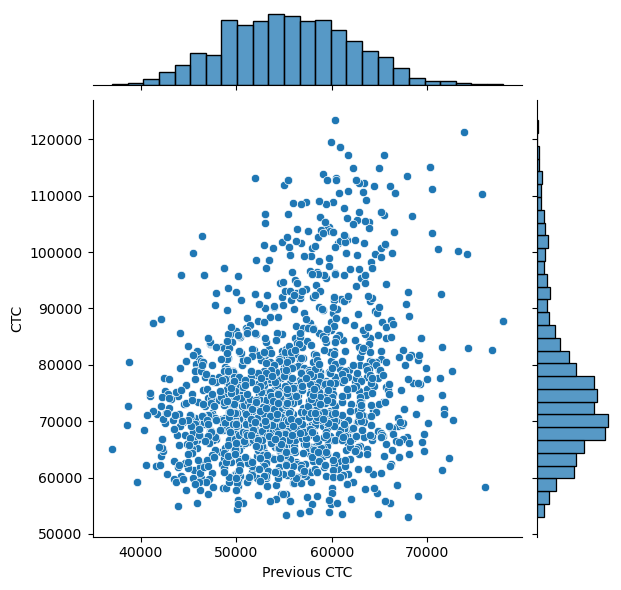

In [18]:
# joint plot using Seaborn (sns) to visualize the relationship between Previous CTC on the x-axis and CTC on the y-axis using data from the employees dataset.
sns.jointplot(x='Previous CTC',y='CTC',data=employees)

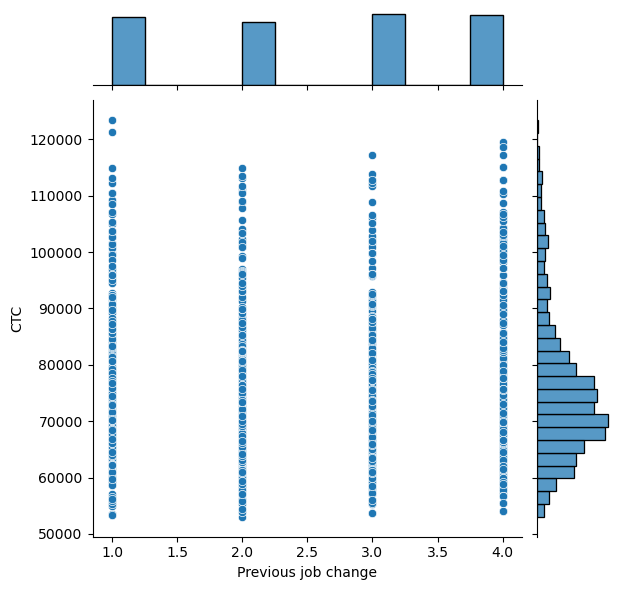

In [19]:
# joint plot using Seaborn (sns) to visualize the relationship between Previous job change on the x-axis and CTC on the y-axis using data from the employees dataset.
sns.jointplot(x='Previous job change',y='CTC',data=employees)

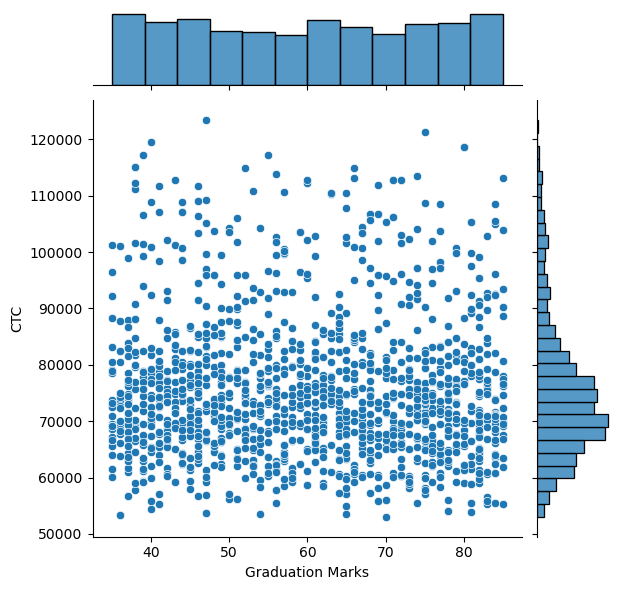

In [20]:
# joint plot using Seaborn (sns) to visualize the relationship between Graduation Marks on the x-axis and CTC on the y-axis using data from the employees dataset.
sns.jointplot(x='Graduation Marks',y='CTC',data=employees)

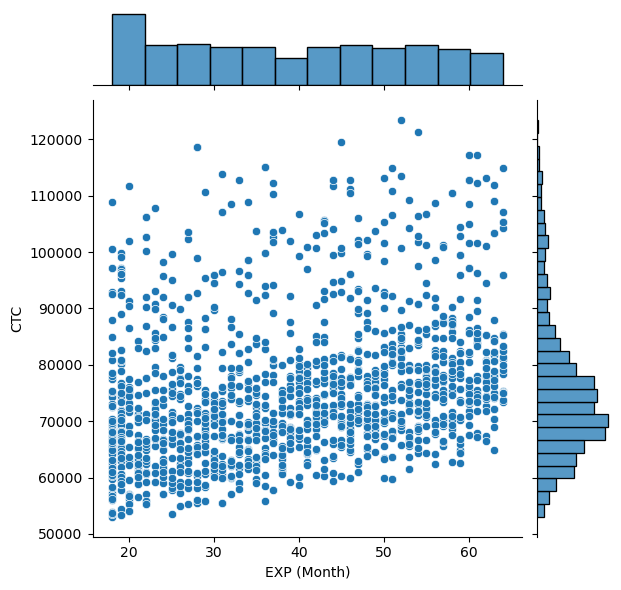

In [21]:
# joint plot using Seaborn (sns) to visualize the relationship between EXP(Month) on the x-axis and CTC on the y-axis using data from the employees dataset.
sns.jointplot(x='EXP (Month)',y='CTC',data=employees)

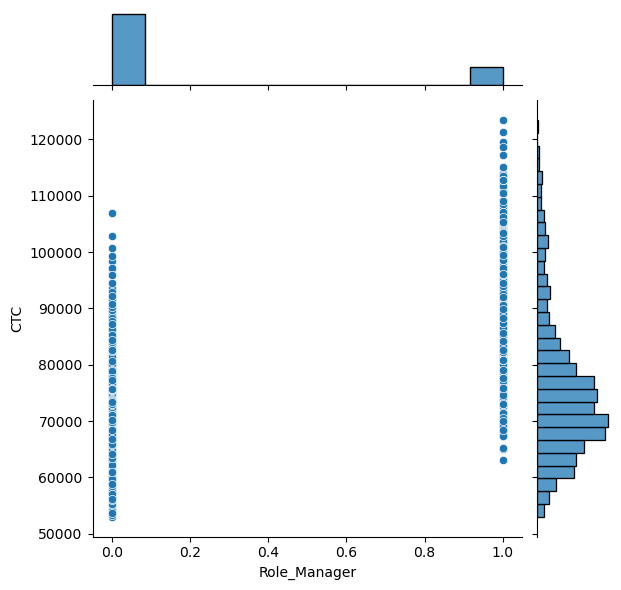

In [22]:
# joint plot using Seaborn (sns) to visualize the relationship between Role_Manager on the x-axis and CTC on the y-axis using data from the employees dataset.
sns.jointplot(x='Role_Manager',y='CTC',data=employees)

C:\Users\saisr\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


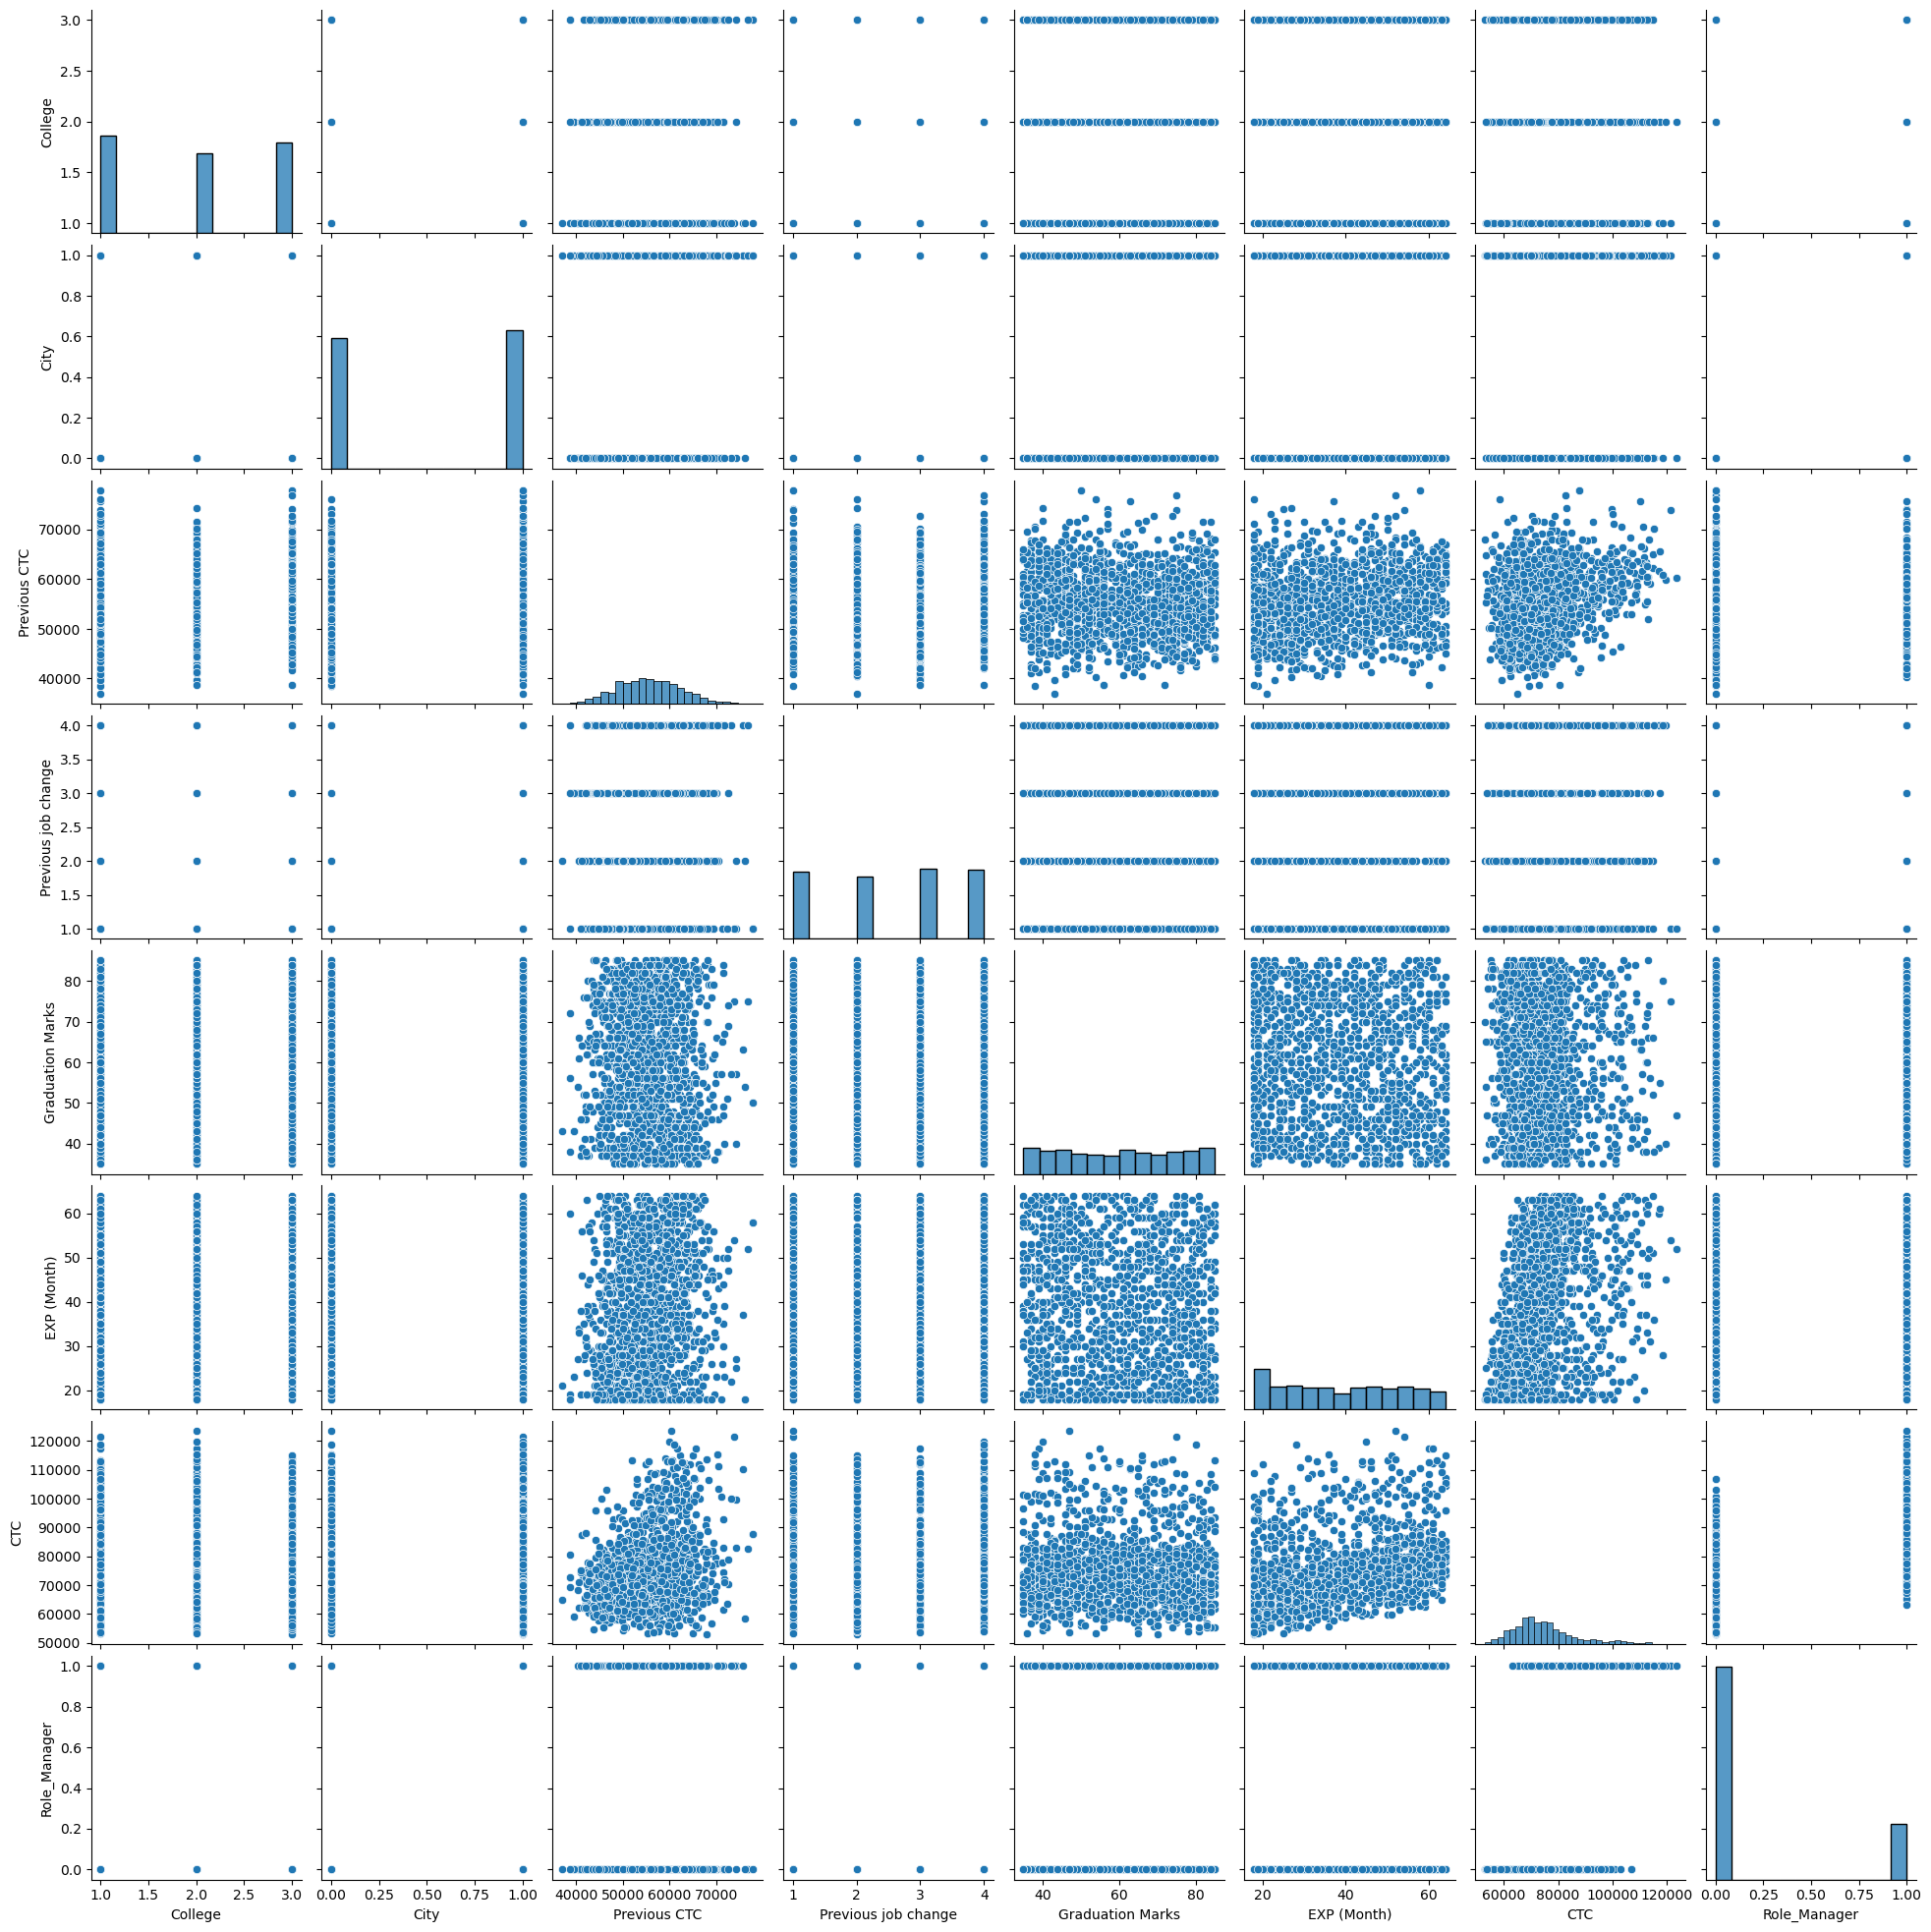

In [23]:
# pair plot using seaborn(sns) to visualize pairwise relationships between all numerical variables in the employees dataset
sns.pairplot(employees)

## Simple Linear Regression using Sklearn Library

Intercept :  48262.17974591337


Coefficients :  [0.48796566]


Predictions :  [75355.49721457 76115.74771645 77709.44356957 ... 70175.25374344
 73662.744332   69904.92076652]


Joint Plot with regression line : 


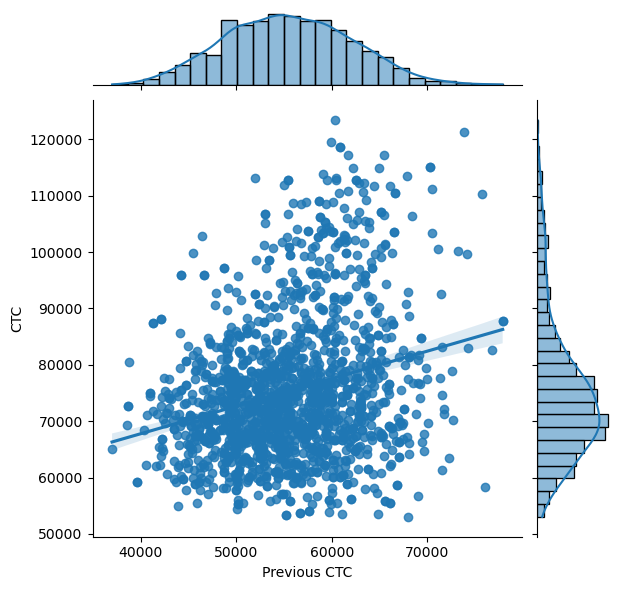

In [24]:
# importing the linear regression class from the scikit learn library
from sklearn.linear_model import LinearRegression
# defining the target variable 'y' as CTC and the feature variable 'x' as Previous CTC from the employees dataset
y1 = employees['CTC']
x1 = employees[['Previous CTC']]
# instance of the Linear Regression Model
lr1 = LinearRegression()
# fitting the Linear Regression model to the data
lr1.fit(x1,y1)
# printing intercept of the Linear Regression Model
print("Intercept : ",lr1.intercept_)
print("\n")
# printing coefficients of the Linear Regression Model
print("Coefficients : ",lr1.coef_)
print("\n")
# using the trained model to make predictions on 'x' and store them in 'lr_pred'
lr_pred1 = lr1.predict(x1)
# printing the predictions made by the linear regression model
print("Predictions : ",lr_pred1)
print("\n")
print("Joint Plot with regression line : ")
# joint plot using seaborn to visualize the relationship b/w 'Previous CTC' and 'CTC'
# The 'kind' parameter is set to 'reg' to display a regression line on the plot.
sns.jointplot(x = employees['Previous CTC'], y = employees['CTC'], data = employees, kind = 'reg')

Intercept :  75031.27935794443


Coefficients :  [127.34124197]


Predictions :  [75413.30308385 75158.62059991 75285.96184188 ... 75158.62059991
 75285.96184188 75413.30308385]


Joint Plot with regression line : 


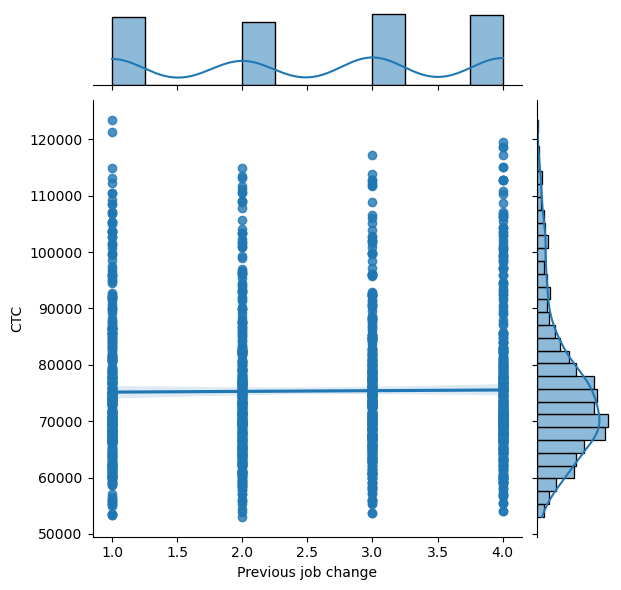

In [25]:
# importing the linear regression class from the scikit learn library
from sklearn.linear_model import LinearRegression
# defining the target variable 'y2' as CTC and the feature variable 'x2' as Previous job change from the employees dataset
y2 = employees['CTC']
x2 = employees[['Previous job change']]
# instance of the Linear Regression Model
lr2 = LinearRegression()
# fitting the Linear Regression model to the data
lr2.fit(x2,y2)
# printing intercept of the Linear Regression Model
print("Intercept : ",lr2.intercept_)
print("\n")
# printing coefficients of the Linear Regression Model
print("Coefficients : ",lr2.coef_)
print("\n")
# using the trained model to make predictions on 'x2' and store them in 'lr_pred2'
lr_pred2 = lr2.predict(x2)
# printing the predictions made by the linear regression model
print("Predictions : ",lr_pred2)
print("\n")
print("Joint Plot with regression line : ")
# joint plot using seaborn to visualize the relationship b/w 'Previous job change' and 'CTC'
# The 'kind' parameter is set to 'reg' to display a regression line on the plot.
sns.jointplot(x = employees['Previous job change'], y = employees['CTC'], data = employees, kind = 'reg')

Intercept :  75628.18882364876


Coefficients :  [-4.59291379]


Predictions :  [75325.05651336 75242.3840651  75389.35730645 ... 75352.61399612
 75320.46359957 75283.72028923]


Joint Plot with regression line : 


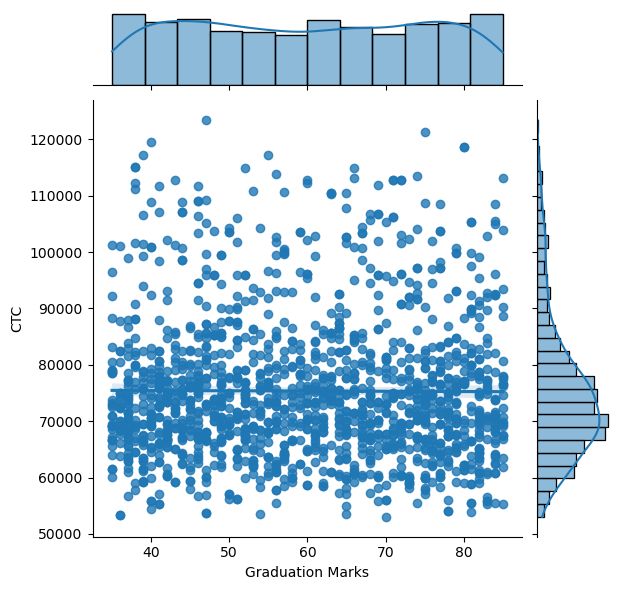

In [26]:
# importing the linear regression class from the scikit learn library
from sklearn.linear_model import LinearRegression
# defining the target variable 'y3' as CTC and the feature variable 'x3' as Graduation Marks from the employees dataset
y3 = employees['CTC']
x3 = employees[['Graduation Marks']]
# instance of the Linear Regression Model
lr3 = LinearRegression()
# fitting the Linear Regression model to the data
lr3.fit(x3,y3)
# printing intercept of the Linear Regression Model
print("Intercept : ",lr3.intercept_)
print("\n")
# printing coefficients of the Linear Regression Model
print("Coefficients : ",lr3.coef_)
print("\n")
# using the trained model to make predictions on 'x3' and store them in 'lr_pred3'
lr_pred3 = lr3.predict(x3)
# printing the predictions made by the linear regression model
print("Predictions : ",lr_pred3)
print("\n")
print("Joint Plot with regression line : ")
# joint plot using seaborn to visualize the relationship b/w 'Graduation Marks' and 'CTC'
# The 'kind' parameter is set to 'reg' to display a regression line on the plot.
sns.jointplot(x = employees['Graduation Marks'], y = employees['CTC'], data = employees, kind = 'reg')

Intercept :  64864.26270700768


Coefficients :  [268.6413489]


Predictions :  [69968.44833614 69699.80698724 72386.22047626 ... 69968.44833614
 72654.86182516 69699.80698724]


Joint Plot with regression line : 


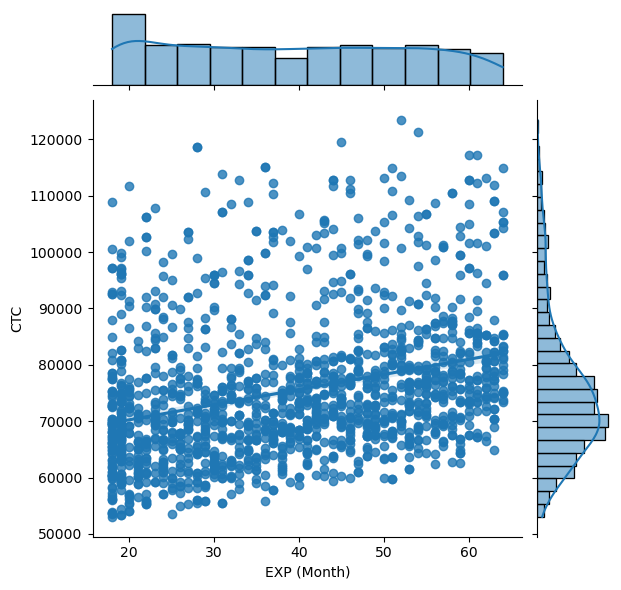

In [27]:
# importing the linear regression class from the scikit learn library
from sklearn.linear_model import LinearRegression
# defining the target variable 'y4' as CTC and the feature variable 'x4' as EXP(Month) from the employees dataset
y4 = employees['CTC']
x4 = employees[['EXP (Month)']]
# instance of the Linear Regression Model
lr4 = LinearRegression()
# fitting the linear regression model to the data
lr4.fit(x4,y4)
# printing intercept of the Linear Regression Model
print("Intercept : ",lr4.intercept_)
print("\n")
# printing coefficients of the Linear Regression Model
print("Coefficients : ",lr4.coef_)
print("\n")
# using the trained model to make predictions on 'x4' and store them in 'lr_pred4'
lr_pred4 = lr4.predict(x4)
# printing the predictions made by the linear regression model
print("Predictions : ",lr_pred4)
print("\n")
print("Joint Plot with regression line : ")
# joint plot using seaborn to visualize the relationship b/w 'EXP(Month)' and 'CTC'
# The 'kind' parameter is set to 'reg' to display a regression line on the plot.
sns.jointplot(x = employees['EXP (Month)'], y = employees['CTC'], data = employees, kind = 'reg')

## Feature Selection

### Correlation Analysis

In [28]:
# it shows the pairwise correlation b/w numerical variables
employees.corr()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
College,1.000000,-0.014946,0.041979,-0.055060,0.003539,0.011752,-0.029592,-0.014749
City,-0.014946,1.000000,0.004644,0.051670,-0.018616,-0.023613,-0.020365,-0.048671
Previous CTC,0.041979,0.004644,1.000000,0.005756,-0.032976,0.119163,0.258000,0.012321
Previous job change,-0.055060,0.051670,0.005756,1.000000,0.019267,0.023488,0.011370,-0.017150
Graduation Marks,0.003539,-0.018616,-0.032976,0.019267,1.000000,-0.057061,-0.005450,0.017858
EXP (Month),0.011752,-0.023613,0.119163,0.023488,-0.057061,1.000000,0.301115,-0.026751
CTC,-0.029592,-0.020365,0.258000,0.011370,-0.005450,0.301115,1.000000,0.621311
Role_Manager,-0.014749,-0.048671,0.012321,-0.017150,0.017858,-0.026751,0.621311,1.000000


Here I have created three datasets, and these datasets are selected based on the correlation analysis. In the correlation analysis, it shows the pair-wise correlation between the target variable and feature variables. So, I have taken the set of feature variables that affects the target variable more and paired them as three different datasets.

### 1st Dataset

In [29]:
X1 = employees.loc[:,['Role_Manager','Previous CTC','Graduation Marks','EXP (Month)']]
Y1 = employees['CTC']

### 2nd Dataset

In [30]:
X2 = employees.loc[:,['Previous job change','Graduation Marks','EXP (Month)','Role_Manager']]
Y2 = employees['CTC']

### 3rd Dataset

In [31]:
X3 = employees.loc[:,['EXP (Month)','Role_Manager','Previous CTC','Previous job change']]
Y3 = employees['CTC']

## Data Splitting

In [32]:
# importing the train_test_split function from the scikit-learn library to split data into training and testing sets.
from sklearn.model_selection import train_test_split
# Split the data for the first set (X1,Y1) into training and testing sets
# X_train1 and Y_train1 will be training data and X_test1 and Y_test1 will be testing data
# The test_size parameter is set to 0.2 that means 20% of the data will be used for testing and remaining 80% will be used for training
# The random_state is set to 0 for reproducibility
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X1,Y1,test_size=0.2,random_state=0)
# Split the data for the first set (X2,Y2) into training and testing sets
# X_train2 and Y_train2 will be training data and X_test2 and Y_test2 will be testing data
# The test_size parameter is set to 0.2 that means 20% of the data will be used for testing and remaining 80% will be used for training
# The random_state is set to 0 for reproducibility
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(X2,Y2,test_size=0.2,random_state=0)
# Split the data for the first set (X3,Y3) into training and testing sets
# X_train3 and Y_train3 will be training data and X_test3 and Y_test3 will be testing data
# The test_size parameter is set to 0.2 that means 20% of the data will be used for testing and remaining 80% will be used for training
# The random_state is set to 0 for reproducibility
X_train3,X_test3,Y_train3,Y_test3 = train_test_split(X3,Y3,test_size=0.2,random_state=0)

## Data Standardization

In [33]:
# importing the StandardScaler class from the scikit-learn library to standardize the data
from sklearn.preprocessing import StandardScaler
# creating StandardScaler object Scaler1 and fit it to X_train1 data to compute mean and std
# Then standardize X_train1 and X_test1 using Scaler1
Scaler1 = StandardScaler().fit(X_train1)
X_train_s1 = Scaler1.transform(X_train1)
X_test_s1 = Scaler1.transform(X_test1)
# creating StandardScaler object Scaler2 and fit it to X_train2 data to compute mean and std
# Then standardize X_train2 and X_test2 using Scaler2
Scaler2 = StandardScaler().fit(X_train2)
X_train_s2 = Scaler2.transform(X_train2)
X_test_s2 = Scaler2.transform(X_test2)
# creating StandardScaler object Scaler3 and fit it to X_train3 data to compute mean and std
# Then standardize X_train3 and X_test3 using Scaler3
Scaler3 = StandardScaler().fit(X_train3)
X_train_s3 = Scaler3.transform(X_train3)
X_test_s3 = Scaler3.transform(X_test3)

## Variables used for Data Storing

In [34]:
model1 = []
r2_score1 = []
mse_1 = []

model2 = []
r2_score2 = []
mse_2 = []

model3 = []
r2_score3 = []
mse_3 = []

## Multiple Linear Regression

### 1st Model using Multiple Linear Regression with 1st Dataset

In [35]:
# importing necessary libraries for linear regression modeling and performance evaluation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
# creating a linear regression model 'lm1'
lm1 = LinearRegression()
# fitting 'lm1' to the standardized training data
lm1.fit(X_train_s1,Y_train1)
# use 'lm1' to make predictions on the training and testing data
Y_train_pred1 = lm1.predict(X_train_s1)
Y_test_pred1 = lm1.predict(X_test_s1)
# printing the intercept and coefficients
print("Intercept : ",lm1.intercept_)
print("\n")
print("Coefficents : ",lm1.coef_)
print("\n")
# displaying metrics for the training data
print("Metrics for training data")
print("\n")
# calculating and displaying R-squared score for the training data
print("r2_score : ",r2_score(Y_train1,Y_train_pred1))
print("\n")
# calculating and displaying mean squared error for the training data
print("Mean Squared Error : ",mean_squared_error(Y_train1,Y_train_pred1))
print("\n")
# displaying metrics for the testing data
print("Metrics for testing data")
print("\n")
# calculating and displaying R-squared score for the testing data
print("r2_score : ",r2_score(Y_test1,Y_test_pred1))
print("\n")
# calculating and displaying mean squared error for the testing data
print("Mean Squared Error : ",mean_squared_error(Y_test1,Y_test_pred1))
# appending information about the model, R-squared score and Mean Squared Error to relevant lists that are used for comparison of models.
model1.append("Multiple Linear Regression : ")
r2_score1.append(r2_score(Y_test1,Y_test_pred1))
mse_1.append(mean_squared_error(Y_test1,Y_test_pred1))

Intercept :  75332.82624704957


Coefficents :  [7796.22420991 2879.05332715  139.1765987  3622.37023962]


Metrics for training data


r2_score :  0.5309144842970452


Mean Squared Error :  75442511.52392834


Metrics for testing data


r2_score :  0.5400627034648029


Mean Squared Error :  68247525.12612636


### 2nd Model using Multiple Linear Regression with 2nd Dataset

In [36]:
# importing necessary libraries for linear regression modeling and performance evaluation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
# creating a linear regression model 'lm2'
lm2 = LinearRegression()
# fitting 'lm2' to the standardized training data
lm2.fit(X_train_s2,Y_train2)
# use 'lm2' to make predictions on the training and testing data
Y_train_pred2 = lm2.predict(X_train_s2)
Y_test_pred2 = lm2.predict(X_test_s2)
# printing the intercept and coefficients
print("Intercept : ",lm2.intercept_)
print("\n")
print("Coefficents : ",lm2.coef_)
print("\n")
# displaying metrics for the training data
print("Metrics for training data")
print("\n")
# calculating and displaying R-squared score for the training data
print("r2_score : ",r2_score(Y_train2,Y_train_pred2))
print("\n")
# calculating and displaying mean squared error for the training data
print("Mean Squared Error : ",mean_squared_error(Y_train2,Y_train_pred2))
print("\n")
# displaying metrics for the testing data
print("Metrics for testing data")
print("\n")
# calculating and displaying R-squared score for the testing data
print("r2_score : ",r2_score(Y_test2,Y_test_pred2))
print("\n")
# calculating and displaying mean squared error for the testing data
print("Mean Squared Error : ",mean_squared_error(Y_test2,Y_test_pred2))
# appending information about the model, R-squared score and Mean Squared Error to relevant lists that are used for comparison of models.
model2.append("Multiple Linear Regression : ")
r2_score2.append(r2_score(Y_test2,Y_test_pred2))
mse_2.append(mean_squared_error(Y_test2,Y_test_pred2))

Intercept :  75332.82624704957


Coefficents :  [ 171.14379304   -9.05695573 4045.93724502 7868.4451159 ]


Metrics for training data


r2_score :  0.4808849947407984


Mean Squared Error :  83488699.7263658


Metrics for testing data


r2_score :  0.5144239483284632


Mean Squared Error :  72051916.72157082


### 3rd Model using Multiple Linear Regression with 3rd Dataset

In [37]:
# importing necessary libraries for linear regression modeling and performance evaluation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
# creating a linear regression model 'lm3'
lm3 = LinearRegression()
# fitting 'lm3' to the standardized training data
lm3.fit(X_train_s3,Y_train3)
# use 'lm3' to make predictions on the training and testing data
Y_train_pred3 = lm3.predict(X_train_s3)
Y_test_pred3 = lm3.predict(X_test_s3)
# printing the intercept and coefficients
print("Intercept : ",lm3.intercept_)
print("\n")
print("Coefficents : ",lm3.coef_)
print("\n")
# displaying metrics for the training data
print("Metrics for training data")
print("\n")
# calculating and displaying R-squared score for the training data
print("r2_score : ",r2_score(Y_train3,Y_train_pred3))
print("\n")
# calculating and displaying mean squared error for the training data
print("Mean Squared Error : ",mean_squared_error(Y_train3,Y_train_pred3))
print("\n")
# displaying metrics for the testing data
print("Metrics for testing data")
print("\n")
# calculating and displaying R-squared score for the testing data
print("r2_score : ",r2_score(Y_test3,Y_test_pred3))
print("\n")
# calculating and displaying mean squared error for the testing data
print("Mean Squared Error : ",mean_squared_error(Y_test3,Y_test_pred3))
# appending information about the model, R-squared score and Mean Squared Error to relevant lists that are used for comparison of models.
model3.append("Multiple Linear Regression : ")
r2_score3.append(r2_score(Y_test3,Y_test_pred3))
mse_3.append(mean_squared_error(Y_test3,Y_test_pred3))

Intercept :  75332.82624704957


Coefficents :  [3614.64768069 7800.48916163 2870.54766396  148.49070915]


Metrics for training data


r2_score :  0.5309314014735758


Mean Squared Error :  75439790.7528906


Metrics for testing data


r2_score :  0.5408657517802107


Mean Squared Error :  68128365.27434623


## Ridge Regression

### 1st Model using Ridge Regression with 1st Dataset

In [38]:
# importing necessary libraries for Ridge regression modeling, validation, and performance evaluation
from sklearn.linear_model import Ridge
from sklearn.model_selection import validation_curve
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
# defining a range of alpha values for Ridge regression regularization
param_range1 = np.logspace(-2,8,100)
# computing validation curves to determine optimal alpha for Ridge regression
train_scores1, test_scores1 = validation_curve(Ridge(),X_train_s1,Y_train1,param_name = "alpha",param_range = param_range1,scoring='r2')
# Calculating the mean training and testing scores across the alpha values
train_mean1 = np.mean(train_scores1, axis = 1)
test_mean1 = np.mean(test_scores1, axis = 1)
# finding the alpha values that gives the highest testing score
alpha1 = np.where(test_mean1 == max(test_mean1))
# creating a ridge regression model with the best alpha value
lm_r_best1 = Ridge(alpha = param_range1[alpha1[0][0]])
# fitting the Ridge regression model to the standardized training data
lm_r_best1.fit(X_train_s1,Y_train1)
# using the model to make predictions on the training and testing data
Y_train_pred1 = lm_r_best1.predict(X_train_s1)
Y_test_pred1 = lm_r_best1.predict(X_test_s1)
# printing metrics for the training data
print("Metrics for training data")
print("\n")
# calculating and displaying R-squared score for the training data
print("r2_score : ",r2_score(Y_train1,Y_train_pred1))
print("\n")
# calculating and displaying mean squared error for the training data
print("Mean Squared Error : ",mean_squared_error(Y_train1,Y_train_pred1))
print("\n")
# printing metrics for the testing data
print("Metrics for testing data")
print("\n")
# calculating and displaying R-squared score for the testing data
print("r2_score : ",r2_score(Y_test1,Y_test_pred1))
print("\n")
# calculating and displaying mean squared error for the testing data
print("Mean Squared Error : ",mean_squared_error(Y_test1,Y_test_pred1))
# appending information about the model, R-squared score and Mean Squared Error to relevant lists that are used for comparison of models.
model1.append("Ridge Regression : ")
r2_score1.append(r2_score(Y_test1,Y_test_pred1))
mse_1.append(mean_squared_error(Y_test1,Y_test_pred1))

Metrics for training data


r2_score :  0.530913131380808


Mean Squared Error :  75442729.1119702


Metrics for testing data


r2_score :  0.5399907783134518


Mean Squared Error :  68258197.69738992


Validation Curve


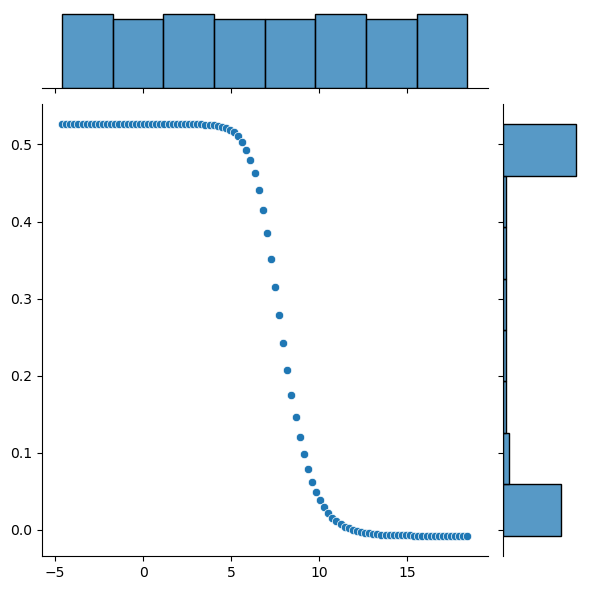

In [39]:
print("Validation Curve")
sns.jointplot(x=np.log(param_range1),y=test_mean1)

### 2nd Model using Ridge Regression with 2nd Dataset

In [40]:
# importing necessary libraries for Ridge regression modeling, validation, and performance evaluation
from sklearn.linear_model import Ridge
from sklearn.model_selection import validation_curve
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
# defining a range of alpha values for Ridge regression regularization
param_range2 = np.logspace(-2,8,100)
# computing validation curves to determine optimal alpha for Ridge regression
train_scores2, test_scores2 = validation_curve(Ridge(),X_train_s2,Y_train2,param_name = "alpha",param_range = param_range2,scoring='r2')
# Calculating the mean training and testing scores across the alpha values
train_mean2 = np.mean(train_scores2, axis = 1)
test_mean2 = np.mean(test_scores2, axis = 1)
# finding the alpha values that gives the highest testing score
alpha2 = np.where(test_mean2 == max(test_mean2))
# creating a ridge regression model with the best alpha value
lm_r_best2 = Ridge(alpha = param_range2[alpha2[0][0]])
# fitting the Ridge regression model to the standardized training data
lm_r_best2.fit(X_train_s2,Y_train2)
# using the model to make predictions on the training and testing data
Y_train_pred2 = lm_r_best2.predict(X_train_s2)
Y_test_pred2 = lm_r_best2.predict(X_test_s2)
# printing metrics for the training data
print("Metrics for training data")
print("\n")
# calculating and displaying R-squared score for the training data
print("r2_score : ",r2_score(Y_train2,Y_train_pred2))
print("\n")
# calculating and displaying mean squared error for the training data
print("Mean Squared Error : ",mean_squared_error(Y_train2,Y_train_pred2))
print("\n")
# printing metrics for the testing data
print("Metrics for testing data")
print("\n")
# calculating and displaying R-squared score for the testing data
print("r2_score : ",r2_score(Y_test2,Y_test_pred2))
print("\n")
# calculating and displaying mean squared error for the testing data
print("Mean Squared Error : ",mean_squared_error(Y_test2,Y_test_pred2))
# appending information about the model, R-squared score and Mean Squared Error to relevant lists that are used for comparison of models.
model2.append("Ridge Regression : ")
r2_score2.append(r2_score(Y_test2,Y_test_pred2))
mse_2.append(mean_squared_error(Y_test2,Y_test_pred2))

Metrics for training data


r2_score :  0.480884462466157


Mean Squared Error :  83488785.33151545


Metrics for testing data


r2_score :  0.5143917125202686


Mean Squared Error :  72056700.01300271


Validation Curve


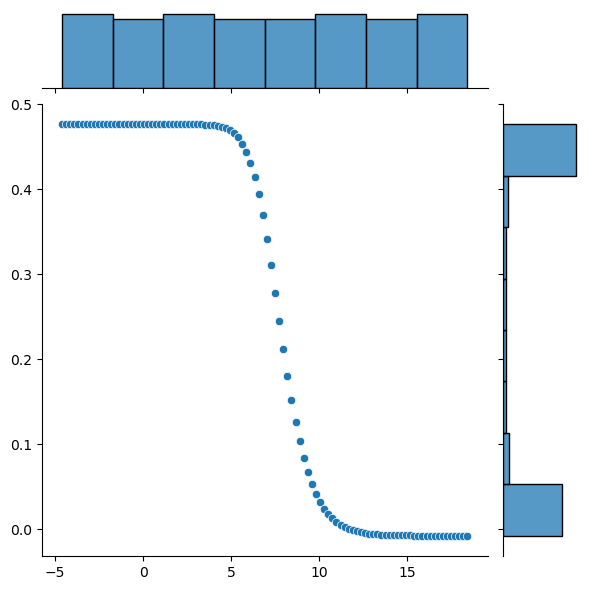

In [41]:
print("Validation Curve")
sns.jointplot(x=np.log(param_range2),y=test_mean2)

### 3rd Model using Ridge Regression with 3rd Dataset

In [42]:
# importing necessary libraries for Ridge regression modeling, validation, and performance evaluation
from sklearn.linear_model import Ridge
from sklearn.model_selection import validation_curve
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
# defining a range of alpha values for Ridge regression regularization
param_range3 = np.logspace(-2,8,100)
# computing validation curves to determine optimal alpha for Ridge regression
train_scores3, test_scores3 = validation_curve(Ridge(),X_train_s3,Y_train3,param_name = "alpha",param_range = param_range3,scoring='r2')
# Calculating the mean training and testing scores across the alpha values
train_mean3 = np.mean(train_scores3, axis = 1)
test_mean3 = np.mean(test_scores3, axis = 1)
# finding the alpha values that gives the highest testing score
alpha3 = np.where(test_mean3 == max(test_mean3))
# creating a ridge regression model with the best alpha value
lm_r_best3 = Ridge(alpha = param_range3[alpha3[0][0]])
# fitting the Ridge regression model to the standardized training data
lm_r_best3.fit(X_train_s3,Y_train3)
# using the model to make predictions on the training and testing data
Y_train_pred3 = lm_r_best3.predict(X_train_s3)
Y_test_pred3 = lm_r_best3.predict(X_test_s3)
# printing metrics for the training data
print("Metrics for training data")
print("\n")
# calculating and displaying R-squared score for the training data
print("r2_score : ",r2_score(Y_train3,Y_train_pred3))
print("\n")
# calculating and displaying mean squared error for the training data
print("Mean Squared Error : ",mean_squared_error(Y_train3,Y_train_pred3))
print("\n")
# printing metrics for the testing data
print("Metrics for testing data")
print("\n")
# calculating and displaying R-squared score for the testing data
print("r2_score : ",r2_score(Y_test3,Y_test_pred3))
print("\n")
# calculating and displaying mean squared error for the testing data
print("Mean Squared Error : ",mean_squared_error(Y_test3,Y_test_pred3))
# appending information about the model, R-squared score and Mean Squared Error to relevant lists that are used for comparison of models.
model3.append("Ridge Regression : ")
r2_score3.append(r2_score(Y_test3,Y_test_pred3))
mse_3.append(mean_squared_error(Y_test3,Y_test_pred3))

Metrics for training data


r2_score :  0.5309308677432358


Mean Squared Error :  75439876.59215865


Metrics for testing data


r2_score :  0.5408190944511828


Mean Squared Error :  68135288.49466155


Validation Curve


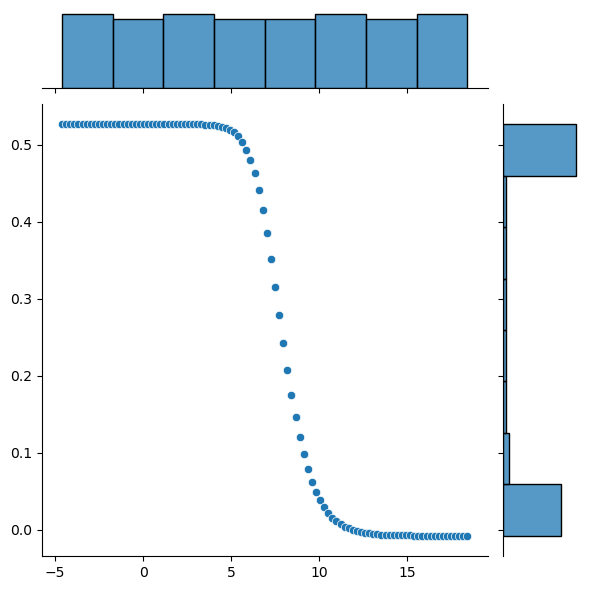

In [43]:
print("Validation Curve")
sns.jointplot(x=np.log(param_range3),y=test_mean3)

## Lasso Regression

### 1st Model using Lasso Regression with 1st Dataset

In [44]:
# importing necessary libraries for lasso regression modeling, validation, and performance evaluation
from sklearn.linear_model import Lasso
from sklearn.model_selection import validation_curve
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
# defining a range of alpha values for lasso regression regularization
param_range1 = np.logspace(-2,8,100)
# computing validation curves to determine the optimal alpha for Lasso regression
train_scores1, test_scores1 = validation_curve(Lasso(),X_train_s1,Y_train1,param_name = "alpha",param_range = param_range1,scoring='r2')
# calculating the mean training and testing scores across the alpha values
train_mean1 = np.mean(train_scores1, axis = 1)
test_mean1 = np.mean(test_scores1, axis = 1)
# finding the alpha value that gives the highest testing score
alpha1 = np.where(test_mean1 == max(test_mean1))
# creating a lasso regression model with the best alpha value
lm_r_best1 = Lasso(alpha = param_range1[alpha1[0][0]])
# fitting the Lasso regression model to the standardized training data
lm_r_best1.fit(X_train_s1,Y_train1)
# using the model to make predictions on the training and testing data
Y_train_pred1 = lm_r_best1.predict(X_train_s1)
Y_test_pred1 = lm_r_best1.predict(X_test_s1)
# printing metrics for the training data
print("Metrics for training data")
print("\n")
# calculating and displaying R-squared score for the training data
print("r2_score : ",r2_score(Y_train1,Y_train_pred1))
print("\n")
# calculating and displaying mean squared error for the training data
print("Mean Squared Error : ",mean_squared_error(Y_train1,Y_train_pred1))
print("\n")
# printing metrics for the testing data
print("Metrics for testing data")
print("\n")
# calculating and displaying R-squared score for the testing data
print("r2_score : ",r2_score(Y_test1,Y_test_pred1))
print("\n")
# calculating and displaying mean squared error for the testing data
print("Mean Squared Error : ",mean_squared_error(Y_test1,Y_test_pred1))
# appending information about the model, R-squared score and Mean Squared Error to relevant lists that are used for comparison of models.
model1.append("Lasso Regression : ")
r2_score1.append(r2_score(Y_test1,Y_test_pred1))
mse_1.append(mean_squared_error(Y_test1,Y_test_pred1))

Metrics for training data


r2_score :  0.5308862148498531


Mean Squared Error :  75447058.06826659


Metrics for testing data


r2_score :  0.5400980525145439


Mean Squared Error :  68242279.8781794


Validation Curve


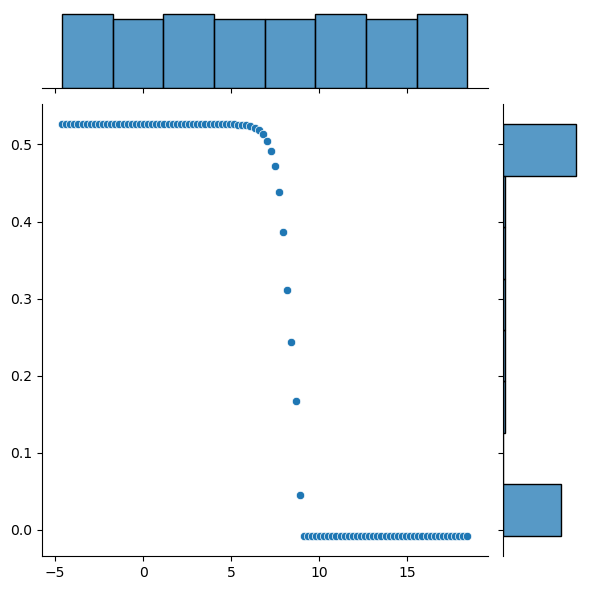

In [45]:
print("Validation Curve")
sns.jointplot(x=np.log(param_range1),y=test_mean1)

### 2nd Model using Lasso Regression with 2nd Dataset

In [46]:
# importing necessary libraries for lasso regression modeling, validation, and performance evaluation
from sklearn.linear_model import Lasso
from sklearn.model_selection import validation_curve
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
# defining a range of alpha values for lasso regression regularization
param_range2 = np.logspace(-2,8,100)
# computing validation curves to determine the optimal alpha for Lasso regression
train_scores2, test_scores2 = validation_curve(Lasso(),X_train_s2,Y_train2,param_name = "alpha",param_range = param_range2,scoring='r2')
# calculating the mean training and testing scores across the alpha values
train_mean2 = np.mean(train_scores2, axis = 1)
test_mean2 = np.mean(test_scores2, axis = 1)
# finding the alpha value that gives the highest testing score
alpha2 = np.where(test_mean2 == max(test_mean2))
# creating a lasso regression model with the best alpha value
lm_r_best2 = Lasso(alpha = param_range2[alpha2[0][0]])
# fitting the Lasso regression model to the standardized training data
lm_r_best2.fit(X_train_s2,Y_train2)
# using the model to make predictions on the training and testing data
Y_train_pred2 = lm_r_best2.predict(X_train_s2)
Y_test_pred2 = lm_r_best2.predict(X_test_s2)
# printing metrics for the training data
print("Metrics for training data")
print("\n")
# calculating and displaying R-squared score for the training data
print("r2_score : ",r2_score(Y_train2,Y_train_pred2))
print("\n")
# calculating and displaying mean squared error for the training data
print("Mean Squared Error : ",mean_squared_error(Y_train2,Y_train_pred2))
print("\n")
# printing metrics for the testing data
print("Metrics for testing data")
print("\n")
# calculating and displaying R-squared score for the testing data
print("r2_score : ",r2_score(Y_test2,Y_test_pred2))
print("\n")
# calculating and displaying mean squared error for the testing data
print("Mean Squared Error : ",mean_squared_error(Y_test2,Y_test_pred2))
# appending information about the model, R-squared score and Mean Squared Error to relevant lists that are used for comparison of models.
model2.append("Lasso Regression : ")
r2_score2.append(r2_score(Y_test2,Y_test_pred2))
mse_2.append(mean_squared_error(Y_test2,Y_test_pred2))

Metrics for training data


r2_score :  0.48065960482348014


Mean Squared Error :  83524948.94077437


Metrics for testing data


r2_score :  0.5138358877809628


Mean Squared Error :  72139175.7399056


Validation Curve


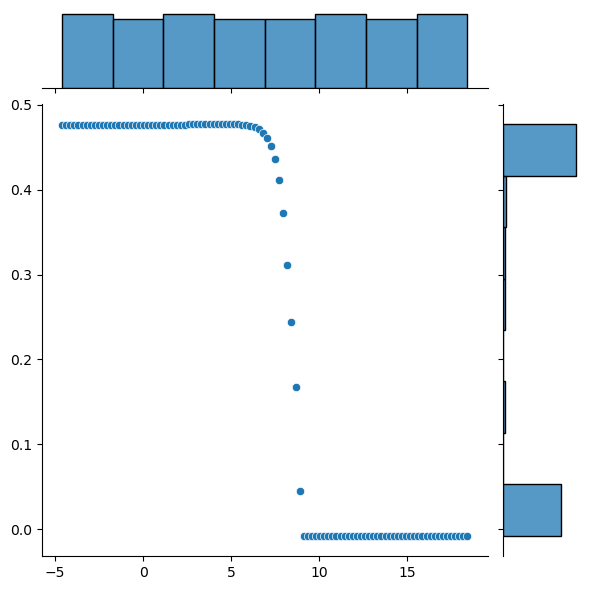

In [47]:
print("Validation Curve")
sns.jointplot(x=np.log(param_range2),y=test_mean2)

### 3rd Model using Lasso Regression with 3rd Dataset

In [48]:
# importing necessary libraries for lasso regression modeling, validation, and performance evaluation
from sklearn.linear_model import Lasso
from sklearn.model_selection import validation_curve
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
# defining a range of alpha values for lasso regression regularization
param_range3 = np.logspace(-2,8,100)
# computing validation curves to determine the optimal alpha for Lasso regression
train_scores3, test_scores3 = validation_curve(Lasso(),X_train_s3,Y_train3,param_name = "alpha",param_range = param_range3,scoring='r2')
# calculating the mean training and testing scores across the alpha values
train_mean3 = np.mean(train_scores3, axis = 1)
test_mean3 = np.mean(test_scores3, axis = 1)
# finding the alpha value that gives the highest testing score
alpha3 = np.where(test_mean3 == max(test_mean3))
# creating a lasso regression model with the best alpha value
lm_r_best3 = Lasso(alpha = param_range3[alpha3[0][0]])
# fitting the Lasso regression model to the standardized training data
lm_r_best3.fit(X_train_s3,Y_train3)
# using the model to make predictions on the training and testing data
Y_train_pred3 = lm_r_best3.predict(X_train_s3)
Y_test_pred3 = lm_r_best3.predict(X_test_s3)
# printing metrics for the training data
print("Metrics for training data")
print("\n")
# calculating and displaying R-squared score for the training data
print("r2_score : ",r2_score(Y_train3,Y_train_pred3))
print("\n")
# calculating and displaying mean squared error for the training data
print("Mean Squared Error : ",mean_squared_error(Y_train3,Y_train_pred3))
print("\n")
# printing metrics for the testing data
print("Metrics for testing data")
print("\n")
# calculating and displaying R-squared score for the testing data
print("r2_score : ",r2_score(Y_test3,Y_test_pred3))
print("\n")
# calculating and displaying mean squared error for the testing data
print("Mean Squared Error : ",mean_squared_error(Y_test3,Y_test_pred3))
# appending information about the model, R-squared score and Mean Squared Error to relevant lists that are used for comparison of models.
model3.append("Lasso Regression : ")
r2_score3.append(r2_score(Y_test3,Y_test_pred3))
mse_3.append(mean_squared_error(Y_test3,Y_test_pred3))

Metrics for training data


r2_score :  0.53093114407262


Mean Squared Error :  75439832.15040538


Metrics for testing data


r2_score :  0.540852146560431


Mean Squared Error :  68130384.07687812


Validation Curve


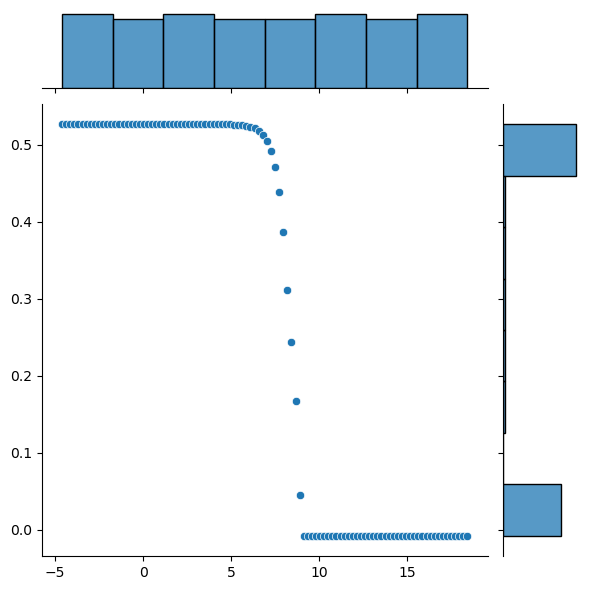

In [49]:
print("Validation Curve")
sns.jointplot(x=np.log(param_range3),y=test_mean3)

## Decision Trees using Regression

### Decision Trees using Regression for 1st Dataset

In [50]:
# importing necessary libraries for Decision Tree regression modeling, metrics, and visualization
from sklearn import tree
from sklearn.metrics import r2_score, mean_squared_error
# creating a decision tree regressor model with a maximum depth of 3
regtree1 = tree.DecisionTreeRegressor(max_depth = 3)
# fitting the decision tree regressor model to the standardized training data
regtree1.fit(X_train_s1,Y_train1)
# using the model to make predictions on the training and testing data
Y_train_pred1 = regtree1.predict(X_train_s1)
Y_test_pred1 = regtree1.predict(X_test_s1)
# printing metrics for the training data
print("Metrics for training data")
print("\n")
# calculating and displaying R-squared score for the training data
print("r2_score : ",r2_score(Y_train1,Y_train_pred1))
print("\n")
# calculating and displaying mean squared error for the training data
print("Mean Squared Error : ",mean_squared_error(Y_train1,Y_train_pred1))
print("\n")
# printing metrics for the testing data
print("Metrics for testing data")
print("\n")
# calculating and displaying R-squared score for the testing data
print("r2_score : ",r2_score(Y_test1,Y_test_pred1))
print("\n")
# calculating and displaying mean squared error for the testing data
print("Mean Squared Error : ",mean_squared_error(Y_test1,Y_test_pred1))
print("\n")
# generating the decision tree visualization and displaying it
dot_data1 = tree.export_graphviz(regtree1, out_file = None,feature_names = X_train1.columns,filled = True)
from IPython.display import Image
import pydotplus
graph1 = pydotplus.graph_from_dot_data(dot_data1)
Image(graph1.create_png())
# appending information about the model, R-squared score and Mean Squared Error to relevant lists that are used for comparison of models.
model1.append("Decision Trees using Regression : ")
r2_score1.append(r2_score(Y_test1,Y_test_pred1))
mse_1.append(mean_squared_error(Y_test1,Y_test_pred1))

Metrics for training data


r2_score :  0.6137194061789908


Mean Squared Error :  62125086.31211998


Metrics for testing data


r2_score :  0.5927831611924912


Mean Squared Error :  60424631.026134744




### Decision Trees using Regression for 2nd Dataset

In [51]:
# importing necessary libraries for Decision Tree regression modeling, metrics, and visualization
from sklearn import tree
from sklearn.metrics import r2_score, mean_squared_error
# creating a decision tree regressor model with a maximum depth of 3
regtree2 = tree.DecisionTreeRegressor(max_depth = 3)
# fitting the decision tree regressor model to the standardized training data
regtree2.fit(X_train_s2,Y_train2)
# using the model to make predictions on the training and testing data
Y_train_pred2 = regtree2.predict(X_train_s2)
Y_test_pred2 = regtree2.predict(X_test_s2)
# printing metrics for the training data
print("Metrics for training data")
print("\n")
# calculating and displaying R-squared score for the training data
print("r2_score : ",r2_score(Y_train2,Y_train_pred2))
print("\n")
# calculating and displaying mean squared error for the training data
print("Mean Squared Error : ",mean_squared_error(Y_train2,Y_train_pred2))
print("\n")
# printing metrics for the testing data
print("Metrics for testing data")
print("\n")
# calculating and displaying R-squared score for the testing data
print("r2_score : ",r2_score(Y_test2,Y_test_pred2))
print("\n")
# calculating and displaying mean squared error for the testing data
print("Mean Squared Error : ",mean_squared_error(Y_test2,Y_test_pred2))
print("\n")
# generating the decision tree visualization and displaying it
dot_data2 = tree.export_graphviz(regtree2, out_file = None,feature_names = X_train2.columns,filled = True)
from IPython.display import Image
import pydotplus
graph2 = pydotplus.graph_from_dot_data(dot_data2)
Image(graph2.create_png())
# appending information about the model, R-squared score and Mean Squared Error to relevant lists that are used for comparison of models.
model2.append("Decision Trees using Regression : ")
r2_score2.append(r2_score(Y_test2,Y_test_pred2))
mse_2.append(mean_squared_error(Y_test2,Y_test_pred2))

Metrics for training data


r2_score :  0.49077792022586586


Mean Squared Error :  81897631.31788144


Metrics for testing data


r2_score :  0.4828279362642468


Mean Squared Error :  76740272.38109708




### Decision Trees using Regression for 3rd Subset

In [52]:
# importing necessary libraries for Decision Tree regression modeling, metrics, and visualization
from sklearn import tree
from sklearn.metrics import r2_score, mean_squared_error
# creating a decision tree regressor model with a maximum depth of 3
regtree3 = tree.DecisionTreeRegressor(max_depth = 3)
# fitting the decision tree regressor model to the standardized training 
regtree3.fit(X_train_s3,Y_train3)
# using the model to make predictions on the training and testing data
Y_train_pred3 = regtree3.predict(X_train_s3)
Y_test_pred3 = regtree3.predict(X_test_s3)
# printing metrics for the training data
print("Metrics for training data")
print("\n")
# calculating and displaying R-squared score for the training data
print("r2_score : ",r2_score(Y_train3,Y_train_pred3))
print("\n")
# calculating and displaying mean squared error for the training data
print("Mean Squared Error : ",mean_squared_error(Y_train3,Y_train_pred3))
print("\n")
# printing metrics for the testing data
print("Metrics for testing data")
print("\n")
# calculating and displaying R-squared score for the testing data
print("r2_score : ",r2_score(Y_test3,Y_test_pred3))
print("\n")
# calculating and displaying mean squared error for the testing data
print("Mean Squared Error : ",mean_squared_error(Y_test3,Y_test_pred3))
print("\n")
# generating the decision tree visualization and displaying it
dot_data3 = tree.export_graphviz(regtree3, out_file = None,feature_names = X_train3.columns,filled = True)
from IPython.display import Image
import pydotplus
graph3 = pydotplus.graph_from_dot_data(dot_data3)
Image(graph3.create_png())
# appending information about the model, R-squared score and Mean Squared Error to relevant lists that are used for comparison of models.
model3.append("Decision Trees using Regression : ")
r2_score3.append(r2_score(Y_test3,Y_test_pred3))
mse_3.append(mean_squared_error(Y_test3,Y_test_pred3))

Metrics for training data


r2_score :  0.6137194061789908


Mean Squared Error :  62125086.31211998


Metrics for testing data


r2_score :  0.5927831611924911


Mean Squared Error :  60424631.02613475




## Bagging

### 1st Model using Bagging with 1st Dataset

In [53]:
# importing necessary libraries for BaggingRegressor and Decision Tree Regression
from sklearn import tree
from sklearn.ensemble import BaggingRegressor
# creating a decision tree regressor model
regtree1 = tree.DecisionTreeRegressor()
# creating a bagging regressor with 100 base estimators and also allowing bootstrap sampling
bag_reg1 = BaggingRegressor(estimator = regtree1, n_estimators = 100, bootstrap = True, n_jobs = -1,random_state = 42)
# fitting the bagging regressor model to the standardized training data
bag_reg1.fit(X_train_s1,Y_train1)
# using the model to make predictions on the training and testing data
Y_train_pred1 = bag_reg1.predict(X_train_s1)
Y_test_pred1 = bag_reg1.predict(X_test_s1)
# printing metrics for the training data
print("Metrics for training data")
print("\n")
# calculating and displaying R-squared score for the training data
print("r2_score : ",r2_score(Y_train1,Y_train_pred1))
print("\n")
# calculating and displaying mean squared error for the training data
print("Mean Squared Error : ",mean_squared_error(Y_train1,Y_train_pred1))
print("\n")
# printing metrics for the testing data
print("Metrics for testing data")
print("\n")
# calculating and displaying R-squared score for the testing data
print("r2_score : ",r2_score(Y_test1,Y_test_pred1))
print("\n")
# calculating and displaying mean squared error for the testing data
print("Mean Squared Error : ",mean_squared_error(Y_test1,Y_test_pred1))
# appending information about the model, R-squared score and Mean Squared Error to relevant lists that are used for comparison of models.
model1.append("Bagging : ")
r2_score1.append(r2_score(Y_test1,Y_test_pred1))
mse_1.append(mean_squared_error(Y_test1,Y_test_pred1))

Metrics for training data


r2_score :  0.9498021285230813


Mean Squared Error :  8073268.882964687


Metrics for testing data


r2_score :  0.6693012897004375


Mean Squared Error :  49070533.549609266


### 2nd Model using Bagging with 2nd Dataset


In [54]:
# importing necessary libraries for BaggingRegressor and Decision Tree Regression
from sklearn import tree
from sklearn.ensemble import BaggingRegressor
# creating a decision tree regressor model
regtree2 = tree.DecisionTreeRegressor()
# creating a bagging regressor with 100 base estimators and also allowing bootstrap sampling
bag_reg2 = BaggingRegressor(estimator = regtree2, n_estimators = 100, bootstrap = True, n_jobs = -1,random_state = 42)
# fitting the bagging regressor model to the standardized training data
bag_reg2.fit(X_train_s2,Y_train2)
# using the model to make predictions on the training and testing data
Y_train_pred2 = bag_reg2.predict(X_train_s2)
Y_test_pred2 = bag_reg2.predict(X_test_s2)
# printing metrics for the training data
print("Metrics for training data")
print("\n")
# calculating and displaying R-squared score for the training data
print("r2_score : ",r2_score(Y_train2,Y_train_pred2))
print("\n")
# calculating and displaying mean squared error for the training data
print("Mean Squared Error : ",mean_squared_error(Y_train2,Y_train_pred2))
print("\n")
# printing metrics for the testing data
print("Metrics for testing data")
print("\n")
# calculating and displaying R-squared score for the testing data
print("r2_score : ",r2_score(Y_test2,Y_test_pred2))
print("\n")
# calculating and displaying mean squared error for the testing data
print("Mean Squared Error : ",mean_squared_error(Y_test2,Y_test_pred2))
# appending information about the model, R-squared score and Mean Squared Error to relevant lists that are used for comparison of models.
model2.append("Bagging : ")
r2_score2.append(r2_score(Y_test2,Y_test_pred2))
mse_2.append(mean_squared_error(Y_test2,Y_test_pred2))

Metrics for training data


r2_score :  0.9189479444382889


Mean Squared Error :  13035513.634628212


Metrics for testing data


r2_score :  0.4992230079242832


Mean Squared Error :  74307499.31943834


### 3rd Model using Bagging with 3rd Dataset

In [55]:
# importing necessary libraries for BaggingRegressor and Decision Tree Regression
from sklearn import tree
from sklearn.ensemble import BaggingRegressor
# creating a decision tree regressor model
regtree3 = tree.DecisionTreeRegressor()
# creating a bagging regressor with 100 base estimators and also allowing bootstrap sampling
bag_reg3 = BaggingRegressor(estimator = regtree3, n_estimators = 100, bootstrap = True, n_jobs = -1,random_state = 42)
# fitting the bagging regressor model to the standardized training data
bag_reg3.fit(X_train_s3,Y_train3)
# using the model to make predictions on the training and testing data
Y_train_pred3 = bag_reg3.predict(X_train_s3)
Y_test_pred3 = bag_reg3.predict(X_test_s3)
# printing metrics for the training data
print("Metrics for training data")
print("\n")
# calculating and displaying R-squared score for the training data
print("r2_score : ",r2_score(Y_train3,Y_train_pred3))
print("\n")
# calculating and displaying mean squared error for the training data
print("Mean Squared Error : ",mean_squared_error(Y_train3,Y_train_pred3))
print("\n")
# printing metrics for the testing data
print("Metrics for testing data")
print("\n")
# calculating and displaying R-squared score for the testing data
print("r2_score : ",r2_score(Y_test3,Y_test_pred3))
print("\n")
# calculating and displaying mean squared error for the testing data
print("Mean Squared Error : ",mean_squared_error(Y_test3,Y_test_pred3))
# appending information about the model, R-squared score and Mean Squared Error to relevant lists that are used for comparison of models.
model3.append("Bagging : ")
r2_score3.append(r2_score(Y_test3,Y_test_pred3))
mse_3.append(mean_squared_error(Y_test3,Y_test_pred3))

Metrics for training data


r2_score :  0.94874021735168


Mean Squared Error :  8244054.897676265


Metrics for testing data


r2_score :  0.6544846626483167


Mean Squared Error :  51269090.036855735


## Random Forest

### 1st Model using Random Forest with 1st Dataset

In [56]:
# importing the randomforestregressor class from the scikit-learn ensemble module
from sklearn.ensemble import RandomForestRegressor
# creating a randomforestregressor model with 100 estimators
rf_reg1 = RandomForestRegressor(n_estimators = 100, n_jobs = -1,random_state=42)
# training the randomforestregressor model using the training data
rf_reg1.fit(X_train_s1,Y_train1)
# making predictions on both training and testing data
Y_train_pred1 = rf_reg1.predict(X_train_s1)
Y_test_pred1 = rf_reg1.predict(X_test_s1)
# printing the metrics for the training data
print("Metrics for training data")
print("\n")
# calculating and displaying R-squared score for the training data
print("r2_score : ",r2_score(Y_train1,Y_train_pred1))
print("\n")
# calculating and displaying mean squared error for the training data
print("Mean Squared Error : ",mean_squared_error(Y_train1,Y_train_pred1))
print("\n")
# printing the metrics for the testing data
print("Metrics for testing data")
print("\n")
# calculating and displaying R-squared score for the testing data
print("r2_score : ",r2_score(Y_test1,Y_test_pred1))
print("\n")
# calculating and displaying mean squared error for the testing data
print("Mean Squared Error : ",mean_squared_error(Y_test1,Y_test_pred1))
# appending information about the model, R-squared score and Mean Squared Error to relevant lists that are used for comparison of models.
model1.append("Random Forest : ")
r2_score1.append(r2_score(Y_test1,Y_test_pred1))
mse_1.append(mean_squared_error(Y_test1,Y_test_pred1))

Metrics for training data


r2_score :  0.9498893645237861


Mean Squared Error :  8059238.8121819515


Metrics for testing data


r2_score :  0.6628972458605019


Mean Squared Error :  50020793.82675418


### 2nd Model using Random Forest with 2nd Dataset

In [57]:
# importing the randomforestregressor class from the scikit-learn ensemble module
from sklearn.ensemble import RandomForestRegressor
# creating a randomforestregressor model with 100 estimators
rf_reg2 = RandomForestRegressor(n_estimators = 100, n_jobs = -1,random_state=42)
# training the randomforestregressor model using the training data
rf_reg2.fit(X_train_s2,Y_train2)
# making predictions on both training and testing data
Y_train_pred2 = rf_reg2.predict(X_train_s2)
Y_test_pred2 = rf_reg2.predict(X_test_s2)
# printing the metrics for the training data
print("Metrics for training data")
print("\n")
# calculating and displaying R-squared score for the training data
print("r2_score : ",r2_score(Y_train2,Y_train_pred2))
print("\n")
# calculating and displaying mean squared error for the training data
print("Mean Squared Error : ",mean_squared_error(Y_train2,Y_train_pred2))
print("\n")
# printing the metrics for the testing data
print("Metrics for testing data")
print("\n")
# calculating and displaying R-squared score for the testing data
print("r2_score : ",r2_score(Y_test2,Y_test_pred2))
print("\n")
# calculating and displaying mean squared error for the testing data
print("Mean Squared Error : ",mean_squared_error(Y_test2,Y_test_pred2))
# appending information about the model, R-squared score and Mean Squared Error to relevant lists that are used for comparison of models.
model2.append("Random Forest : ")
r2_score2.append(r2_score(Y_test2,Y_test_pred2))
mse_2.append(mean_squared_error(Y_test2,Y_test_pred2))

Metrics for training data


r2_score :  0.9192144589700042


Mean Squared Error :  12992650.393370172


Metrics for testing data


r2_score :  0.4964390739689133


Mean Squared Error :  74720591.72138065


### 3rd Model using Random Forest with 3rd Dataset

In [58]:
# importing the randomforestregressor class from the scikit-learn ensemble module
from sklearn.ensemble import RandomForestRegressor
# creating a randomforestregressor model with 100 estimators
rf_reg3 = RandomForestRegressor(n_estimators = 100, n_jobs = -1,random_state=42)
# training the randomforestregressor model using the training data
rf_reg3.fit(X_train_s3,Y_train3)
# making predictions on both training and testing data
Y_train_pred3 = rf_reg3.predict(X_train_s3)
Y_test_pred3 = rf_reg3.predict(X_test_s3)
# printing the metrics for the training data
print("Metrics for training data")
print("\n")
# calculating and displaying R-squared score for the training data
print("r2_score : ",r2_score(Y_train3,Y_train_pred3))
print("\n")
# calculating and displaying mean squared error for the training data
print("Mean Squared Error : ",mean_squared_error(Y_train3,Y_train_pred3))
print("\n")
# printing the metrics for the testing data
print("Metrics for testing data")
print("\n")
# calculating and displaying R-squared score for the testing data
print("r2_score : ",r2_score(Y_test3,Y_test_pred3))
print("\n")
# calculating and displaying mean squared error for the testing data
print("Mean Squared Error : ",mean_squared_error(Y_test3,Y_test_pred3))
# appending information about the model, R-squared score and Mean Squared Error to relevant lists that are used for comparison of models.
model3.append("Random Forest : ")
r2_score3.append(r2_score(Y_test3,Y_test_pred3))
mse_3.append(mean_squared_error(Y_test3,Y_test_pred3))

Metrics for training data


r2_score :  0.9487242614674665


Mean Squared Error :  8246621.06511986


Metrics for testing data


r2_score :  0.6546815104184345


Mean Squared Error :  51239880.8963091


## Gradient Boosting

### 1st Model using Gradient Boosting with 1st Dataset

In [59]:
# importing the gradientboostingregressor class from the scikit-learn ensemble module
from sklearn.ensemble import GradientBoostingRegressor
# creating a gradientboostingregressor model with learning rate 0.02 and 100 estimators and max depth is 3
gb_reg1 = GradientBoostingRegressor(learning_rate = 0.02, n_estimators = 100, max_depth = 3)
# training the gradientboostingregressor model using the training data
gb_reg1.fit(X_train_s1,Y_train1)
# making predictions on both training and testing data
Y_train_pred1 = gb_reg1.predict(X_train_s1)
Y_test_pred1 = gb_reg1.predict(X_test_s1)
# printing the metrics for the training data
print("Metrics for training data")
print("\n")
# calculating and displaying R-squared score for the training data
print("r2_score : ",r2_score(Y_train1,Y_train_pred1))
print("\n")
# calculating and displaying mean squared error for the training data
print("Mean Squared Error : ",mean_squared_error(Y_train1,Y_train_pred1))
print("\n")
# printing the metrics for the testing data
print("Metrics for testing data")
print("\n")
# calculating and displaying R-squared score for the testing data
print("r2_score : ",r2_score(Y_test1,Y_test_pred1))
print("\n")
# calculating and displaying mean squared error for the testing data
print("Mean Squared Error : ",mean_squared_error(Y_test1,Y_test_pred1))
# appending information about the model, R-squared score and Mean Squared Error to relevant lists that are used for comparison of models.
model1.append("Gradient Boosting : ")
r2_score1.append(r2_score(Y_test1,Y_test_pred1))
mse_1.append(mean_squared_error(Y_test1,Y_test_pred1))

Metrics for training data


r2_score :  0.6306551612485712


Mean Squared Error :  59401327.30820238


Metrics for testing data


r2_score :  0.6071091704096778


Mean Squared Error :  58298874.57765277


### 2nd Model using Gradient Boosting with 2nd Dataset


In [60]:
# importing the gradientboostingregressor class from the scikit-learn ensemble module
from sklearn.ensemble import GradientBoostingRegressor
# creating a gradientboostingregressor model with learning rate 0.02 and 100 estimators and max depth is 3
gb_reg2 = GradientBoostingRegressor(learning_rate = 0.02, n_estimators = 100, max_depth = 3)
# training the gradientboostingregressor model using the training data
gb_reg2.fit(X_train_s2,Y_train2)
# making predictions on both training and testing data
Y_train_pred2 = gb_reg2.predict(X_train_s2)
Y_test_pred2 = gb_reg2.predict(X_test_s2)
# printing the metrics for the training data
print("Metrics for training data")
print("\n")
# calculating and displaying R-squared score for the training data
print("r2_score : ",r2_score(Y_train2,Y_train_pred2))
print("\n")
# calculating and displaying mean squared error for the training data
print("Mean Squared Error : ",mean_squared_error(Y_train2,Y_train_pred2))
print("\n")
# printing the metrics for the testing data
print("Metrics for testing data")
print("\n")
# calculating and displaying R-squared score for the testing data
print("r2_score : ",r2_score(Y_test2,Y_test_pred2))
print("\n")
# calculating and displaying mean squared error for the testing data
print("Mean Squared Error : ",mean_squared_error(Y_test2,Y_test_pred2))
# appending information about the model, R-squared score and Mean Squared Error to relevant lists that are used for comparison of models.
model2.append("Gradient Boosting : ")
r2_score2.append(r2_score(Y_test2,Y_test_pred2))
mse_2.append(mean_squared_error(Y_test2,Y_test_pred2))

Metrics for training data


r2_score :  0.5023003123231531


Mean Squared Error :  80044497.57257673


Metrics for testing data


r2_score :  0.48502272611115393


Mean Squared Error :  76414599.78104539


### 3rd Model using Gradient Boosting with 3rd Dataset

In [61]:
# importing the gradientboostingregressor class from the scikit-learn ensemble module
from sklearn.ensemble import GradientBoostingRegressor
# creating a gradientboostingregressor model with learning rate 0.02 and 100 estimators and max depth is 3
gb_reg3 = GradientBoostingRegressor(learning_rate = 0.02, n_estimators = 100, max_depth = 3)
# training the gradientboostingregressor model using the training data
gb_reg3.fit(X_train_s3,Y_train3)
# making predictions on both training and testing data
Y_train_pred3 = gb_reg3.predict(X_train_s3)
Y_test_pred3 = gb_reg3.predict(X_test_s3)
# printing the metrics for the training data
print("Metrics for training data")
print("\n")
# calculating and displaying R-squared score for the training data
print("r2_score : ",r2_score(Y_train3,Y_train_pred3))
print("\n")
# calculating and displaying mean squared error for the training data
print("Mean Squared Error : ",mean_squared_error(Y_train3,Y_train_pred3))
print("\n")
# printing the metrics for the testing data
print("Metrics for testing data")
print("\n")
# calculating and displaying R-squared score for the testing data
print("r2_score : ",r2_score(Y_test3,Y_test_pred3))
print("\n")
# calculating and displaying mean squared error for the testing data
print("Mean Squared Error : ",mean_squared_error(Y_test3,Y_test_pred3))
# appending information about the model, R-squared score and Mean Squared Error to relevant lists that are used for comparison of models.
model3.append("Gradient Boosting : ")
r2_score3.append(r2_score(Y_test3,Y_test_pred3))
mse_3.append(mean_squared_error(Y_test3,Y_test_pred3))

Metrics for training data


r2_score :  0.6300243664011843


Mean Squared Error :  59502777.355049185


Metrics for testing data


r2_score :  0.606209308510159


Mean Squared Error :  58432400.056147546


## Ada Boosting

### 1st Model using Ada Boosting with 1st Dataset

In [62]:
# importing the AdaBoostRegressor class from the scikit-learn ensemble module
from sklearn.ensemble import AdaBoostRegressor
# creating an AdaBoostRegressor model with specified hyperparameters and also using randomforestregressor as the base estimator
ada_reg1 = AdaBoostRegressor(rf_reg1,learning_rate = 0.05, n_estimators = 100)
# training the AdaBoostregressor model using the training data
ada_reg1.fit(X_train_s1,Y_train1)
# making predictions on both the training and testing data
Y_train_pred1 = ada_reg1.predict(X_train_s1)
Y_test_pred1 = ada_reg1.predict(X_test_s1)
# printing the metrics for the training data
print("Metrics for training data")
print("\n")
# calculating and displaying R-squared score for the training data
print("r2_score : ",r2_score(Y_train1,Y_train_pred1))
print("\n")
# calculating and displaying mean squared error for the training data
print("Mean Squared Error : ",mean_squared_error(Y_train1,Y_train_pred1))
print("\n")
# printing the metrics for the testing data
print("Metrics for testing data")
print("\n")
# calculating and displaying R-squared score for the testing data
print("r2_score : ",r2_score(Y_test1,Y_test_pred1))
print("\n")
# calculating and displaying mean squared error for the testing data
print("Mean Squared Error : ",mean_squared_error(Y_test1,Y_test_pred1))
# appending information about the model, R-squared score and Mean Squared Error to relevant lists that are used for comparison of models.
model1.append("Ada Boosting : ")
r2_score1.append(r2_score(Y_test1,Y_test_pred1))
mse_1.append(mean_squared_error(Y_test1,Y_test_pred1))

Metrics for training data


r2_score :  0.9678403780621644


Mean Squared Error :  5172196.896795075


Metrics for testing data


r2_score :  0.6811989851932023


Mean Squared Error :  47305101.00434201


### 2nd Model using Ada Boosting with 2nd Dataset

In [63]:
# importing the AdaBoostRegressor class from the scikit-learn ensemble module
from sklearn.ensemble import AdaBoostRegressor
# creating an AdaBoostRegressor model with specified hyperparameters and also using randomforestregressor as the base estimator
ada_reg2 = AdaBoostRegressor(rf_reg2,learning_rate = 0.05, n_estimators = 100)
# training the AdaBoostregressor model using the training data
ada_reg2.fit(X_train_s2,Y_train2)
# making predictions on both the training and testing data
Y_train_pred2 = ada_reg2.predict(X_train_s2)
Y_test_pred2 = ada_reg2.predict(X_test_s2)
# printing the metrics for the training data
print("Metrics for training data")
print("\n")
# calculating and displaying R-squared score for the training data
print("r2_score : ",r2_score(Y_train2,Y_train_pred2))
print("\n")
# calculating and displaying mean squared error for the training data
print("Mean Squared Error : ",mean_squared_error(Y_train2,Y_train_pred2))
print("\n")
# printing the metrics for the testing data
print("Metrics for testing data")
print("\n")
# calculating and displaying R-squared score for the testing data
print("r2_score : ",r2_score(Y_test2,Y_test_pred2))
print("\n")
# calculating and displaying mean squared error for the testing data
print("Mean Squared Error : ",mean_squared_error(Y_test2,Y_test_pred2))
# appending information about the model, R-squared score and Mean Squared Error to relevant lists that are used for comparison of models.
model2.append("Ada Boosting : ")
r2_score2.append(r2_score(Y_test2,Y_test_pred2))
mse_2.append(mean_squared_error(Y_test2,Y_test_pred2))

Metrics for training data


r2_score :  0.9439150342054548


Mean Squared Error :  9020083.836810421


Metrics for testing data


r2_score :  0.5416740338259238


Mean Squared Error :  68008428.8185742


### 3rd Model using Ada Boosting with 3rd Dataset

In [65]:
# importing the AdaBoostRegressor class from the scikit-learn ensemble module
from sklearn.ensemble import AdaBoostRegressor
# creating an AdaBoostRegressor model with specified hyperparameters and also using randomforestregressor as the base estimator
ada_reg3 = AdaBoostRegressor(rf_reg3,learning_rate = 0.05, n_estimators = 100)
# training the AdaBoostregressor model using the training data
ada_reg3.fit(X_train_s3,Y_train3)
# making predictions on both the training and testing data
Y_train_pred3 = ada_reg3.predict(X_train_s3)
Y_test_pred3 = ada_reg3.predict(X_test_s3)
# printing the metrics for the training data
print("Metrics for training data")
print("\n")
# calculating and displaying R-squared score for the training data
print("r2_score : ",r2_score(Y_train3,Y_train_pred3))
print("\n")
# calculating and displaying mean squared error for the training data
print("Mean Squared Error : ",mean_squared_error(Y_train3,Y_train_pred3))
print("\n")
# printing the metrics for the testing data
print("Metrics for testing data")
print("\n")
# calculating and displaying R-squared score for the testing data
print("r2_score : ",r2_score(Y_test3,Y_test_pred3))
print("\n")
# calculating and displaying mean squared error for the testing data
print("Mean Squared Error : ",mean_squared_error(Y_test3,Y_test_pred3))
# appending information about the model, R-squared score and Mean Squared Error to relevant lists that are used for comparison of models.
model3.append("Ada Boosting : ")
r2_score3.append(r2_score(Y_test3,Y_test_pred3))
mse_3.append(mean_squared_error(Y_test3,Y_test_pred3))

Metrics for training data


r2_score :  0.9670467521602814


Mean Squared Error :  5299834.884420368


Metrics for testing data


r2_score :  0.6666697908954105


Mean Squared Error :  49461006.951458536


## XGBoost Regressor

### 1st Model using XGBoostRegressor with 1st Dataset

In [66]:
# importing the XGBoost library as xgb and GridSearchCV from scikit-learn for hyperparameter tuning
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
# creating an XGBoost Regressor model with specified hyperparameters
xgb_reg1 = xgb.XGBRegressor(n_estimators = 250,learning_rate = 0.1, random_state = 42)
# defining a parameter grid for hyperparameter tuning
param_test1 = {
    'max_depth' : range(3,10,2), # range of tree depths to explore
    'gamma' : [0.1,0.2,0.3], # Possible gamma values
    'subsample' : [0.8,0.9], # Possible subsample values
    'colsample_bytree' : [0.8,0.9], # Possible colsample_bytree values
    'reg_alpha' : [1e-2,0.1,1] # Possible reg_alpha values
}
# creating a GridSearchCV object to perform hyperparameter tuning for the XGBoost model
grid_search1 = GridSearchCV(xgb_reg1,param_test1,n_jobs=-1,cv=5,scoring='neg_mean_squared_error')
# fitting the grid search to the training data to find the best hyperparameters
grid_search1.fit(X_train_s1,Y_train1)
# getting the best estimator with the optimal hyperparameters
cvxg_reg1 = grid_search1.best_estimator_
# printing the best hyperparameters found by the grid search
print("Best hyperparameters:", grid_search1.best_params_)
print("\n")
# making predictions on both training and testing data using the best XGBoost model
Y_train_pred1 = cvxg_reg1.predict(X_train_s1)
Y_test_pred1 = cvxg_reg1.predict(X_test_s1)
# printing the metrics for the training data
print("Metrics for training data")
print("\n")
# calculating and displaying R-squared score for the training data
print("r2_score : ",r2_score(Y_train1,Y_train_pred1))
print("\n")
# calculating and displaying mean squared error for the training data
print("Mean Squared Error : ",mean_squared_error(Y_train1,Y_train_pred1))
print("\n")
# printing the metrics for the testing data
print("Metrics for testing data")
print("\n")
# calculating and displaying R-squared score for the testing data
print("r2_score : ",r2_score(Y_test1,Y_test_pred1))
print("\n")
# calculating and displaying mean squared error for the testing data
print("Mean Squared Error : ",mean_squared_error(Y_test1,Y_test_pred1))
# appending information about the model, R-squared score and Mean Squared Error to relevant lists that are used for comparison of models.
model1.append("XGBoost Regressor : ")
r2_score1.append(r2_score(Y_test1,Y_test_pred1))
mse_1.append(mean_squared_error(Y_test1,Y_test_pred1))

Best hyperparameters: {'colsample_bytree': 0.8, 'gamma': 0.1, 'max_depth': 3, 'reg_alpha': 1, 'subsample': 0.8}


Metrics for training data


r2_score :  0.7787108559590483


Mean Squared Error :  35589691.51799921


Metrics for testing data


r2_score :  0.5987192390252363


Mean Squared Error :  59543809.60962257


### 2nd Model using XGBoostRegressor with 2nd Dataset

In [67]:
# importing the XGBoost library as xgb and GridSearchCV from scikit-learn for hyperparameter tuning
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
# creating an XGBoost Regressor model with specified hyperparameters
xgb_reg2 = xgb.XGBRegressor(n_estimators = 250,learning_rate = 0.1, random_state = 42)
# defining a parameter grid for hyperparameter tuning
param_test2 = {
    'max_depth' : range(3,10,2), # range of tree depths to explore
    'gamma' : [0.1,0.2,0.3], # Possible gamma values
    'subsample' : [0.8,0.9], # Possible subsample values
    'colsample_bytree' : [0.8,0.9], # Possible colsample_bytree values
    'reg_alpha' : [1e-2,0.1,1]  # Possible reg_alpha values
}
# creating a GridSearchCV object to perform hyperparameter tuning for the XGBoost model
grid_search2 = GridSearchCV(xgb_reg2,param_test2,n_jobs=-1,cv=5,scoring='neg_mean_squared_error')
# fitting the grid search to the training data to find the best hyperparameters
grid_search2.fit(X_train_s2,Y_train2)
# getting the best estimator with the optimal hyperparameters
cvxg_reg2 = grid_search2.best_estimator_
# printing the best hyperparameters found by the grid search
print("Best hyperparameters:", grid_search2.best_params_)
print("\n")
# making predictions on both training and testing data using the best XGBoost model
Y_train_pred2 = cvxg_reg2.predict(X_train_s2)
Y_test_pred2 = cvxg_reg2.predict(X_test_s2)
# printing the metrics for the training data
print("Metrics for training data")
print("\n")
# calculating and displaying R-squared score for the training data
print("r2_score : ",r2_score(Y_train2,Y_train_pred2))
print("\n")
# calculating and displaying mean squared error for the training data
print("Mean Squared Error : ",mean_squared_error(Y_train2,Y_train_pred2))
print("\n")
# printing the metrics for the testing data
print("Metrics for testing data")
print("\n")
# calculating and displaying R-squared score for the testing data
print("r2_score : ",r2_score(Y_test2,Y_test_pred2))
print("\n")
# calculating and displaying mean squared error for the testing data
print("Mean Squared Error : ",mean_squared_error(Y_test2,Y_test_pred2))
# appending information about the model, R-squared score and Mean Squared Error to relevant lists that are used for comparison of models.
model2.append("XGBoost Regressor : ")
r2_score2.append(r2_score(Y_test2,Y_test_pred2))
mse_2.append(mean_squared_error(Y_test2,Y_test_pred2))

Best hyperparameters: {'colsample_bytree': 0.8, 'gamma': 0.1, 'max_depth': 3, 'reg_alpha': 1, 'subsample': 0.8}


Metrics for training data


r2_score :  0.6412996889108533


Mean Squared Error :  57689379.541865855


Metrics for testing data


r2_score :  0.4600392938980332


Mean Squared Error :  80121751.67011023


### 3rd Model using XGBoostRegressor with 3rd Dataset

In [68]:
# importing the XGBoost library as xgb and GridSearchCV from scikit-learn for hyperparameter tuning
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
# creating an XGBoost Regressor model with specified hyperparameters
xgb_reg3 = xgb.XGBRegressor(n_estimators = 250,learning_rate = 0.1, random_state = 42)
# defining a parameter grid for hyperparameter tuning
param_test3 = {
    'max_depth' : range(3,10,2),  # range of tree depths to explore
    'gamma' : [0.1,0.2,0.3], # Possible gamma values
    'subsample' : [0.8,0.9], # Possible subsample values
    'colsample_bytree' : [0.8,0.9], # Possible colsample_bytree values
    'reg_alpha' : [1e-2,0.1,1] # Possible reg_alpha values
}
# creating a GridSearchCV object to perform hyperparameter tuning for the XGBoost model
grid_search3 = GridSearchCV(xgb_reg3,param_test3,n_jobs=-1,cv=5,scoring='neg_mean_squared_error')
# fitting the grid search to the training data to find the best hyperparameters
grid_search3.fit(X_train_s3,Y_train3)
# getting the best estimator with the optimal hyperparameters
cvxg_reg3 = grid_search3.best_estimator_
# printing the best hyperparameters found by the grid search
print("Best hyperparameters:", grid_search3.best_params_)
print("\n")
# making predictions on both training and testing data using the best XGBoost model
Y_train_pred3 = cvxg_reg3.predict(X_train_s3)
Y_test_pred3 = cvxg_reg3.predict(X_test_s3)
# printing the metrics for the training data
print("Metrics for training data")
print("\n")
# calculating and displaying R-squared score for the training data
print("r2_score : ",r2_score(Y_train3,Y_train_pred3))
print("\n")
# calculating and displaying mean squared error for the training data
print("Mean Squared Error : ",mean_squared_error(Y_train3,Y_train_pred3))
print("\n")
# printing the metrics for the testing data
print("Metrics for testing data")
print("\n")
# calculating and displaying R-squared score for the testing data
print("r2_score : ",r2_score(Y_test3,Y_test_pred3))
print("\n")
# calculating and displaying mean squared error for the testing data
print("Mean Squared Error : ",mean_squared_error(Y_test3,Y_test_pred3))
# appending information about the model, R-squared score and Mean Squared Error to relevant lists that are used for comparison of models.
model3.append("XGBoost Regressor : ")
r2_score3.append(r2_score(Y_test3,Y_test_pred3))
mse_3.append(mean_squared_error(Y_test3,Y_test_pred3))

Best hyperparameters: {'colsample_bytree': 0.8, 'gamma': 0.1, 'max_depth': 3, 'reg_alpha': 1, 'subsample': 0.9}


Metrics for training data


r2_score :  0.7618621497838765


Mean Squared Error :  38299450.54323548


Metrics for testing data


r2_score :  0.5888827326219835


Mean Squared Error :  61003393.82461549


## Comparision of R2 Scores and MSE of 1st models of each machine learning technique

In [69]:
com1 = pd.DataFrame({'R2_Score':r2_score1,'Mean Squared Error':mse_1},index=model1)
com1

,R2_Score,Mean Squared Error
Multiple Linear Regression :,0.540063,6.824753e+07
Ridge Regression :,0.539991,6.825820e+07
Lasso Regression :,0.540098,6.824228e+07
Decision Trees using Regression :,0.592783,6.042463e+07
Bagging :,0.669301,4.907053e+07
Random Forest :,0.662897,5.002079e+07
Gradient Boosting :,0.607109,5.829887e+07
Ada Boosting :,0.681199,4.730510e+07
XGBoost Regressor :,0.598719,5.954381e+07
XGBoost Regressor :,0.598719,5.954381e+07


## Comparision of R2 Scores and MSE of 2nd models of each machine learning technique

In [70]:
com2 = pd.DataFrame({'R2_Score':r2_score2,'Mean Squared Error':mse_2},index=model2)
com2

,R2_Score,Mean Squared Error
Multiple Linear Regression :,0.514424,7.205192e+07
Ridge Regression :,0.514392,7.205670e+07
Lasso Regression :,0.513836,7.213918e+07
Decision Trees using Regression :,0.482828,7.674027e+07
Bagging :,0.499223,7.430750e+07
Random Forest :,0.496439,7.472059e+07
Gradient Boosting :,0.485023,7.641460e+07
Ada Boosting :,0.541674,6.800843e+07
XGBoost Regressor :,0.460039,8.012175e+07


## Comparision of R2 Scores and MSE of 3rd models of each machine learning technique

In [71]:
com3 = pd.DataFrame({'R2_Score':r2_score3,'Mean Squared Error':mse_3},index=model3)
com3

,R2_Score,Mean Squared Error
Multiple Linear Regression :,0.540866,6.812837e+07
Ridge Regression :,0.540819,6.813529e+07
Lasso Regression :,0.540852,6.813038e+07
Decision Trees using Regression :,0.592783,6.042463e+07
Bagging :,0.654485,5.126909e+07
Random Forest :,0.654682,5.123988e+07
Gradient Boosting :,0.606209,5.843240e+07
Ada Boosting :,0.666670,4.946101e+07
XGBoost Regressor :,0.588883,6.100339e+07


### When we compare all the models, we can find that the first model of Ada Boosting with the first dataset performs the best. Therefore, the Ada Boosting model is the best accurate model with the given datasets.